# CampusGuard AI

# The Problem

University life can be overwhelming. Students juggle lectures, assignments, part-time jobs, finances, and social life — often at the expense of their health.  

- **Burnout is on the rise:** Studies show that over **50% of students** report high stress, with many experiencing exhaustion, anxiety, or even dropping out.  
- **The signs are often missed:** Burnout builds up gradually — poor sleep, irregular meals, declining motivation — until it’s too late.  
- **Current support is reactive:** Counseling and academic help often come only after a student is already in crisis.  

This leads to lower academic performance, higher dropout rates, and serious long-term health effects.  

# The Solution

**CampusGuardian AI** is an AI-powered student well-being dashboard that aims to **predict burnout risks before they spiral out of control**, and support students with the tools they need to thrive.  

At its core, CampusGuardian AI uses **machine learning** to analyze student lifestyle, stress, and study patterns to predict burnout risk levels (**Low, Medium, High**).  

Around this core, the platform provides supporting features that address the root causes of stress:  

- 🧠 **AI Study Copilot** → personalized learning help to reduce academic overload  
- 📓 **Mental Health Journal** → LLM-based mood classification with tips for self-care  
- 💳 **Financial Tracker** → ML forecasting to anticipate financial stress and spending habits  
- 📷 **Receipt Scanner** → easy categorization of expenses for financial awareness  
- 📅 **Study Planner Dashboard** → track study hours, goals, and workload balance  

# The Vision

With **CampusGuardian AI**, universities and students don’t have to wait until burnout happens.  

- **For students** → it’s a personal safety net, giving them early warnings and practical suggestions.  
- **For universities** → it’s a way to reduce dropout rates, support mental health, and build a healthier academic culture.  

👉 **In one sentence:**  
**CampusGuardian AI** protects student well-being by predicting burnout risks early and empowering students with the tools to stay balanced and succeed.  

# The Approach

##  Two-Prong Approach of CampusGuardian AI  


To make CampusGuardian AI both **scientifically credible** and **practically deployable**, we use a dual-model strategy:

1. **Validated Burnout Prediction (Direct Model)**  
   Based on psychometrically validated constructs (Maslach Burnout Inventory – Student Survey), this model provides a **scientific baseline** of how burnout can be detected using standardized survey items.

2. **Proxy Burnout Prediction (Indirect Model)**  
   Based on real-world lifestyle and stress proxies (sleep, workload, finances, mood), this model shows how burnout risk can be predicted in **settings where validated burnout surveys are not available**.

 Together, these two approaches ensure that CampusGuardian AI is both **anchored in evidence-based psychology** *and* **adaptable to everyday student contexts**.



### 1. Direct Burnout Prediction (Ground-Truth Model)  
- **Dataset:** [Medical Student Burnout dataset (Figshare)](https://figshare.com/articles/dataset/Dataset_Medical_students_achievement_emotions_self-regulated_learning_and_burnout/21687494)  
- **Goal:** Train ML classifiers directly on validated burnout survey scores (e.g., Maslach Burnout Inventory).  
- **Output:** Burnout risk levels → **Low**, **Medium**, or **High**.  
- **Role:** Provides a scientifically grounded baseline for how AI can classify burnout risk when true burnout labels are available.  



### 2. Proxy Burnout Prediction (Indirect Model)  
- **Dataset:** [Kaggle Student Stress Monitoring Dataset](https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets) + similar student mental health datasets  
- **Features:** Sleep, workload, resilience, financial worries, study hours, stress scores.  
- **Goal:** Train models to predict burnout *indirectly* using stress and lifestyle proxies.  
- **Output:** Burnout risk score (%) + **drivers** (via feature importance/SHAP).  
- **Role:** Demonstrates how the system can still predict and explain burnout risk in real-world settings, where explicit burnout labels are rarely collected.  



###  Weekly Survey → ML Models → Dashboard  
- Students complete a short weekly survey aligned with the dataset questions (sleep, workload, stress, mood, finances).  
- Their answers are processed by both models:  
  - The **direct model** assigns a burnout risk category.  
  - The **proxy model** highlights the top contributing factors behind the risk.  
- Results are displayed in the dashboard as a **burnout risk gauge**, **key drivers**, and **personalized recommendations**.  



 **This two-prong approach makes CampusGuardian AI both scientifically credible (direct labels) and practically deployable (proxy features).**  

# Validated Burnout Prediction (Direct Model)

This section uses the **Medical Student Burnout dataset** (Figshare), which is grounded in the **Maslach Burnout Inventory – Student Survey (MBI-SS)**.  
These constructs (Exhaustion, Cynicism, and Academic Efficacy) are **psychometrically validated** and represent the scientific baseline for measuring student burnout.  

- **Why “Direct”?** Because the dataset provides validated burnout constructs that directly capture burnout risk.  
- **Output:** Burnout is classified into *Low, Medium, High* categories using standardized scoring.  
- **Role in CampusGuardian AI:** Establishes an **evidence-based foundation** to ensure predictions are credible and comparable to existing research.  


## Data Preprocessing

In [1]:
import pyreadstat

# Load .sav file
medical_student_burnout, meta = pyreadstat.read_sav("Online learning perceptions (282ae).sav")

# Preview
print(medical_student_burnout.head())
print(medical_student_burnout.columns)

   Year_of_study  Gender  Q1_Q24_1  Q1_Q24_2  Q1_Q24_3  Q1_Q24_4  Q1_Q24_5  \
0            6.0     2.0       4.0       3.0       4.0       4.0       3.0   
1            1.0     2.0       4.0       4.0       2.0       5.0       4.0   
2            1.0     1.0       3.0       3.0       4.0       4.0       4.0   
3            2.0     1.0       2.0       4.0       2.0       2.0       2.0   
4            4.0     2.0       5.0       5.0       5.0       4.0       5.0   

   Q1_Q24_6  Q1_Q24_7  Q1_Q24_8  ...  Hopelessness  Boredom  Exhuastion  \
0       4.0       4.0       4.0  ...          2.50     3.00         2.2   
1       5.0       4.0       4.0  ...          3.00     3.50         2.0   
2       4.0       4.0       4.0  ...          4.00     4.00         3.6   
3       2.0       2.0       4.0  ...          4.00     4.25         2.0   
4       5.0       5.0       5.0  ...          2.75     1.75         3.2   

   Cynicism  Academic_efficacy  AE_5  AE_7  AE_10  AE_11  AE_15  
0       2.8   

## Dataset Summary & Cleaning Rationale  

The dataset comes from a study of **282 medical students**, measuring their **self-regulated learning strategies, emotional states, and burnout levels**.  
It originally contained **122 variables**, many of which were raw survey question responses (e.g., `Q1_Q24_1`, `Q7_3`) on Likert scales.  



##  Why Cleaning Was Needed  

1. **Survey structure**  
   - Many columns were individual questions that actually measured broader constructs (like *time management* or *boredom*).  
   - Keeping all raw questions would add noise and make the model harder to interpret.  

   **Feature Engineering:** We aggregated raw survey items into *validated psychological scales* (e.g., multiple Q-items combined into `Time_management`).  

2. **Human-readable features**  
   - The dataset’s `.sav` format included **variable labels**, but not every column had a clear name.  
   - Mapping coded columns (`Q1_Q24_6`, etc.) to labels (like `Time_management`) made the data **understandable and usable**.  

   
   **Feature Engineering** : Renaming coded variables into descriptive features improves interpretability and usability for ML.  

3. **Focus on meaningful predictors**  
   - Instead of training on 100+ noisy survey items, we aggregated into **psychological scales** that are validated in education research.  
   - This improves interpretability: we can say *“burnout risk increases with low time management and high anxiety”* rather than *“Q1_Q24_6=2”*.  

   **Feature Engineering:** Dimensionality reduction — collapsing redundant survey items into aggregated constructs.  



##  Final Structure After Cleaning  

### Features (Aggregated Scales)  
- **Demographics**: `Year_of_study`, `Gender`  
- **Self-regulated learning**: `Goal_Setting`, `Time_management`, `Help_seeking`, `Task_strategies`, `Self_evaluation`, `Monitoring_strategies`, `Managing_strategies`, `Environmental_structuring`  
- **Emotions**: `Enjoyment`, `Hopeful`, `Pride`, `Anger`, `Anxiety`, `Hopelessness`, `Boredom`  
- **Perceptions**: `Self_efficacy`, `Perceived_learning_progress`, `Satisfaction`  

### Targets (Burnout Outcomes)  
- `Exhaustion`  
- `Cynicism`  
- `Academic_efficacy` (*inverted: lower efficacy → higher burnout*)  
- Combined into a **burnout risk score** (Low / Medium / High).  



##  Why This Approach Matters  
- Keeps the model **scientifically grounded** (features are based on established scales).  
- Makes predictions **transparent** (we can explain *which* factors drive burnout).  
- Reduces **dimensionality and noise**, which improves ML model performance.  



 **In one line:**  
*“We cleaned the dataset by mapping raw survey questions into validated psychological scales, leaving us with aggregated features that capture key aspects of student behavior, emotion, and self-regulation — making the burnout prediction model more interpretable and robust.”*  

- Below is a table of all the features and how they are aggregated together to be used later for predicting the targets which in this case are Exhaustion,  Cynicism and Academic Efficacy

### Feature Glossary (Aggregated Scales)

| **Feature**                  | **Explanation** |
|-------------------------------|-----------------|
| `Year_of_study`              | Current year of study (1–8) |
| `Gender`                     | Gender of the student (coded 1–4) |
| **Self-Regulated Learning (SRL)** | |
| `Goal_Setting`               | How well the student sets clear study goals |
| `Time_management`            | Ability to plan and manage study time effectively |
| `Help_seeking`               | Tendency to seek help when facing difficulties |
| `Task_strategies`            | Use of structured methods to complete academic tasks |
| `Self_evaluation`            | Ability to reflect on one’s own performance and progress |
| `Monitoring_strategies`      | Checking and adjusting learning strategies during study |
| `Managing_strategies`        | How students handle workload and regulate effort |
| `Environmental_structuring`  | Ability to create a good study environment (quiet space, minimal distractions) |
| **Emotions & Motivation**     | |
| `Enjoyment`                  | Positive feelings experienced during studying |
| `Hopeful`                    | Optimism about academic success |
| `Pride`                      | Sense of achievement and self-satisfaction in studies |
| `Anger`                      | Frustration or irritation related to academic tasks |
| `Anxiety`                    | Nervousness or worry about performance and outcomes |
| `Hopelessness`               | Feeling discouraged or pessimistic about studies |
| `Boredom`                    | Lack of interest or disengagement with academic work |
| **Perceptions & Outcomes**    | |
| `Self_efficacy`              | Belief in one’s ability to succeed academically |
| `Perceived_learning_progress`| How much progress the student feels they are making |
| `Satisfaction`               | General satisfaction with learning experiences |
| **Burnout Targets**           | |
| `Exhaustion`                 | Feeling emotionally/physically drained by studies |
| `Cynicism`                   | Detached, negative attitude toward studying |
| `Academic_efficacy` (inverted)| Belief in one’s competence (lower efficacy = higher burnout risk) |

## Burnout Targets & Scoring

### Approach
The dataset measures **burnout using three validated subscales** from the Maslach Burnout Inventory–Student Survey (MBI-SS).  
These serve as the **targets** for our machine learning models:

| **Target**          | **Explanation** |
|----------------------|-----------------|
| `Exhaustion`        | Feeling emotionally/physically drained by academic demands |
| `Cynicism`          | Detached, indifferent, or negative attitude toward studying |
| `Academic_efficacy` | Belief in one’s competence and ability to achieve academically (*lower scores = higher burnout*) |



###  Burnout Score Calculation

Since burnout is a **multi-dimensional construct**, we combine the three targets into a single **Burnout Risk Score**.

### Step 1 — Normalize  
- Each subscale (`Exhaustion`, `Cynicism`, `Academic_efficacy`) is rescaled to the same range (e.g., 0–1).

### Step 2 — Invert Academic Efficacy  
- Because *lower efficacy = higher burnout*, we invert this scale so that **higher values always mean more burnout risk**.  

\[
Academic\_efficacy_{inverted} = 1 - Academic\_efficacy_{normalized}
\]

### Step 3 — Aggregate  
- The three adjusted scores are averaged into one **composite burnout score**:  

\[
Burnout\_Score = \frac{Exhaustion + Cynicism + Academic\_efficacy_{inverted}}{3}
\]

### Step 4 — Categorize Risk Levels  
- Finally, we map the burnout score into categories for easier interpretation:  

| **Burnout Score Range** | **Risk Level** |
|--------------------------|-----------------|
| 0.0 – 0.33              | Low Burnout Risk |
| 0.34 – 0.66             | Medium Burnout Risk |
| 0.67 – 1.0              | High Burnout Risk |



##  Why This Approach?  
- Ensures all three dimensions of burnout are captured.  
- Creates an **interpretable target variable** (Low, Medium, High).  
- Makes it easier to explain predictions to non-technical audiences.  

 This **Burnout Risk Score** becomes the **main target variable** for our ML models.

In [2]:
medical_student_burnout.to_csv("online_learning_perceptions.csv", index=False)

In [3]:
medical_student_burnout.head()

,Year_of_study,Gender,Q1_Q24_1,Q1_Q24_2,Q1_Q24_3,Q1_Q24_4,Q1_Q24_5,Q1_Q24_6,Q1_Q24_7,Q1_Q24_8,...,Hopelessness,Boredom,Exhuastion,Cynicism,Academic_efficacy,AE_5,AE_7,AE_10,AE_11,AE_15
0,6.0,2.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,...,2.50,3.00,2.2,2.8,3.4,1.0,3.0,1.0,1.0,2.0
1,1.0,2.0,4.0,4.0,2.0,5.0,4.0,5.0,4.0,4.0,...,3.00,3.50,2.0,2.2,3.8,0.0,1.0,1.0,1.0,3.0
2,1.0,1.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.00,4.00,3.6,3.8,3.8,1.0,1.0,1.0,2.0,1.0
3,2.0,1.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,4.0,...,4.00,4.25,2.0,2.4,2.0,3.0,3.0,3.0,3.0,3.0
4,4.0,2.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,...,2.75,1.75,3.2,2.4,4.0,1.0,3.0,0.0,1.0,0.0


In [4]:
from ml_utils import birdseye_view

In [5]:
birdseye_view(medical_student_burnout, n_head=10, show_value_counts=True)

🔍 DataFrame Shape: (282, 122)

👀 First Rows (head):


,Year_of_study,Gender,Q1_Q24_1,Q1_Q24_2,Q1_Q24_3,Q1_Q24_4,Q1_Q24_5,Q1_Q24_6,Q1_Q24_7,Q1_Q24_8,...,Hopelessness,Boredom,Exhuastion,Cynicism,Academic_efficacy,AE_5,AE_7,AE_10,AE_11,AE_15
0,6.0,2.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,...,2.50,3.00,2.2,2.8,3.4,1.0,3.0,1.0,1.0,2.0
1,1.0,2.0,4.0,4.0,2.0,5.0,4.0,5.0,4.0,4.0,...,3.00,3.50,2.0,2.2,3.8,0.0,1.0,1.0,1.0,3.0
2,1.0,1.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.00,4.00,3.6,3.8,3.8,1.0,1.0,1.0,2.0,1.0
3,2.0,1.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,4.0,...,4.00,4.25,2.0,2.4,2.0,3.0,3.0,3.0,3.0,3.0
4,4.0,2.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,...,2.75,1.75,3.2,2.4,4.0,1.0,3.0,0.0,1.0,0.0
5,4.0,2.0,4.0,4.0,4.0,4.0,1.0,3.0,4.0,4.0,...,4.00,4.00,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0
6,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,...,3.00,3.00,3.0,3.0,3.2,2.0,2.0,2.0,2.0,1.0
7,4.0,2.0,2.0,2.0,3.0,2.0,3.0,4.0,4.0,4.0,...,2.75,3.50,2.8,2.8,3.4,1.0,3.0,1.0,1.0,2.0
8,1.0,2.0,3.0,2.0,4.0,4.0,2.0,4.0,2.0,4.0,...,4.00,4.00,4.0,3.8,4.0,1.0,1.0,1.0,1.0,1.0
9,3.0,2.0,3.0,3.0,2.0,4.0,1.0,3.0,2.0,2.0,...,3.25,2.75,3.8,3.2,3.2,1.0,1.0,3.0,2.0,2.0




📊 Data Types & Non-Null Counts (.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Columns: 122 entries, Year_of_study to AE_15
dtypes: float64(122)
memory usage: 268.9 KB
None


📈 Descriptive Statistics (.describe()):


,count,mean,std,min,25%,50%,75%,max
Year_of_study,282.0,2.978723,1.886336,1.0,1.0,2.5,5.0,8.0
Gender,282.0,1.684397,0.611024,1.0,1.0,2.0,2.0,4.0
Q1_Q24_1,282.0,3.599291,1.049860,1.0,3.0,4.0,4.0,5.0
Q1_Q24_2,282.0,3.599291,1.171609,1.0,3.0,4.0,4.0,5.0
Q1_Q24_3,282.0,3.570922,1.041969,1.0,3.0,4.0,4.0,5.0
...,...,...,...,...,...,...,...,...
AE_5,282.0,1.851064,0.972477,0.0,1.0,2.0,3.0,4.0
AE_7,282.0,1.989362,0.996378,0.0,1.0,2.0,3.0,4.0
AE_10,282.0,1.755319,1.138328,0.0,1.0,2.0,3.0,4.0
AE_11,282.0,1.939716,1.026300,0.0,1.0,2.0,3.0,4.0




🧮 Missing Values (NaN) per column:
Year_of_study    0
Gender           0
Q1_Q24_1         0
Q1_Q24_2         0
Q1_Q24_3         0
                ..
AE_5             0
AE_7             0
AE_10            0
AE_11            0
AE_15            0
Length: 122, dtype: int64


📦 Number of Unique Values per column:
Year_of_study    8
Gender           4
Q1_Q24_1         5
Q1_Q24_2         5
Q1_Q24_3         5
                ..
AE_5             5
AE_7             5
AE_10            5
AE_11            5
AE_15            5
Length: 122, dtype: int64


🗂 Duplicate Rows: 0

📑 Value Counts (for categorical columns with <= max_unique unique values):

Year_of_study:
Year_of_study
1.0    84
2.0    57
3.0    46
5.0    34
6.0    28
4.0    23
7.0     6
8.0     4
Name: count, dtype: int64

Gender:
Gender
2.0    170
1.0    104
4.0      7
3.0      1
Name: count, dtype: int64

Q1_Q24_1:
Q1_Q24_1
4.0    145
5.0     44
3.0     42
2.0     38
1.0     13
Name: count, dtype: int64

Q1_Q24_2:
Q1_Q24_2
4.0    110
5

In [6]:
medical_student_burnout.columns

Index(['Year_of_study', 'Gender', 'Q1_Q24_1', 'Q1_Q24_2', 'Q1_Q24_3',
       'Q1_Q24_4', 'Q1_Q24_5', 'Q1_Q24_6', 'Q1_Q24_7', 'Q1_Q24_8',
       ...
       'Hopelessness', 'Boredom', 'Exhuastion', 'Cynicism',
       'Academic_efficacy', 'AE_5', 'AE_7', 'AE_10', 'AE_11', 'AE_15'],
      dtype='object', length=122)

In [7]:
medical_student_burnout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Columns: 122 entries, Year_of_study to AE_15
dtypes: float64(122)
memory usage: 268.9 KB


In [8]:
medical_student_burnout.describe(include="all")

,Year_of_study,Gender,Q1_Q24_1,Q1_Q24_2,Q1_Q24_3,Q1_Q24_4,Q1_Q24_5,Q1_Q24_6,Q1_Q24_7,Q1_Q24_8,...,Hopelessness,Boredom,Exhuastion,Cynicism,Academic_efficacy,AE_5,AE_7,AE_10,AE_11,AE_15
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,...,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,2.978723,1.684397,3.599291,3.599291,3.570922,3.744681,3.294326,3.858156,3.808511,3.602837,...,2.860816,2.886525,2.665957,2.586525,3.109220,1.851064,1.989362,1.755319,1.939716,1.918440
std,1.886336,0.611024,1.049860,1.171609,1.041969,1.109033,1.283028,1.166444,1.109101,1.127965,...,0.924363,0.934451,0.851403,0.804057,0.765251,0.972477,0.996378,1.138328,1.026300,1.010838
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,...,2.250000,2.250000,2.000000,2.000000,2.600000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.500000,2.000000,4.000000,4.000000,4.000000,4.000000,3.500000,4.000000,4.000000,4.000000,...,3.000000,3.000000,2.400000,2.400000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,5.000000,2.000000,4.000000,4.000000,4.000000,4.750000,4.000000,5.000000,5.000000,4.000000,...,3.500000,3.500000,3.200000,3.000000,3.600000,3.000000,3.000000,3.000000,3.000000,3.000000
max,8.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [9]:
# Print variable labels
print(meta.column_labels)

# Or show them nicely as a dict
variable_labels = dict(zip(medical_student_burnout.columns, meta.column_labels))
for col, label in variable_labels.items():
    print(f"{col}: {label}")

['Current Level of study', 'Gender', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Year_of_study: Current Level of study
Gender: Gender
Q1_Q24_1: None
Q1_Q24_2: None
Q1_Q24_3: None
Q1_Q24_4: None
Q1_Q24_5: None
Q1_Q24_6: None
Q1_Q24_7: None
Q1_Q24_8: None
Q1_Q24_9: None
Q1_Q24_10: None
Q1_Q24_11: None
Q1_Q24_12: None
Q1_Q24_

In [10]:
# Map short codes to full labels
variable_labels = dict(zip(medical_student_burnout.columns, meta.column_labels))

for col, label in variable_labels.items():
    print(f"{col}: {label}")

Year_of_study: Current Level of study
Gender: Gender
Q1_Q24_1: None
Q1_Q24_2: None
Q1_Q24_3: None
Q1_Q24_4: None
Q1_Q24_5: None
Q1_Q24_6: None
Q1_Q24_7: None
Q1_Q24_8: None
Q1_Q24_9: None
Q1_Q24_10: None
Q1_Q24_11: None
Q1_Q24_12: None
Q1_Q24_13: None
Q1_Q24_14: None
Q1_Q24_15: None
Q1_Q24_16: None
Q1_Q24_17: None
Q1_Q24_18: None
Q1_Q24_19: None
Q1_Q24_20: None
Q1_Q24_21: None
Q1_Q24_22: None
Q1_Q24_23: None
Q1_Q24_24: None
Q1_Q13_1: None
Q1_Q13_2: None
Q1_Q13_3: None
Q1_Q13_4: None
Q1_Q13_5: None
Q1_Q13_6: None
Q1_Q13_7: None
Q1_Q13_8: None
Q1_Q13_9: None
Q1_Q13_10: None
Q1_Q13_11: None
Q1_Q13_12: None
Q1_Q13_13: None
Q1_Q7_1: None
Q1_Q7_2: None
Q1_Q7_3: None
Q1_Q7_4: None
Q1_Q7_5: None
Q1_Q7_6: None
Q1_Q7_7: None
Q1_Q7_1.0: None
Q1_Q7_2.0: None
Q1_Q7_3.0: None
Q1_Q7_4.0: None
Q1_Q7_5.0: None
Q1_Q7_6.0: None
Q1_Q7_7.0: None
Q1_Q27_1: None
Q1_Q27_2: None
Q1_Q27_3: None
Q1_Q27_4: None
Q1_Q27_5: None
Q1_Q27_6: None
Q1_Q27_7: None
Q1_Q27_8: None
Q1_Q27_9: None
Q1_Q27_10: None
Q1_Q27_11: N

In [11]:
import pandas as pd

# Map labels; fall back to the column name if label is None
variable_labels = dict(zip(
    medical_student_burnout.columns,
    [lbl if lbl is not None else col for col, lbl in zip(medical_student_burnout.columns, meta.column_labels)]
))

labels_df = pd.DataFrame([
    {"column": col, "label": variable_labels[col]}
    for col in medical_student_burnout.columns
]).sort_values("column")

labels_df.head(20)

,column,label
119,AE_10,AE_10
120,AE_11,AE_11
121,AE_15,AE_15
117,AE_5,AE_5
118,AE_7,AE_7
116,Academic_efficacy,Academic_efficacy
110,Anger,Anger
111,Anxiety,Anxiety
113,Boredom,Boredom
115,Cynicism,Cynicism


In [12]:
targets = ['Exhuastion', 'Cynicism', 'Academic_efficacy']
targets = [t for t in targets if t in medical_student_burnout.columns]  # defensive

# SRL / emotions / demographics present in your file
feature_cols = [
    'Goal_Setting','Environmental_structuring','Task_strategies','Time_management',
    'Help_seeking','Self_evaluation','Monitoring_strategies','Managing_strategies',
    'Self_efficacy','Perceived_learning_progress','Satisfaction',
    'Enjoyment','Hopeful','Pride','Anger','Anxiety','Hopelessness','Boredom',
    'Year_of_study','Gender'
]
feature_cols = [c for c in feature_cols if c in medical_student_burnout.columns]

In [13]:
import re

def mean_of_prefix(df, prefix):
    cols = [c for c in df.columns if re.match(rf'^{prefix}(_|\.)?\d+', c)]
    return df[cols].mean(axis=1) if cols else None

# Example: create means from item families if they exist
for pref in ['Q1_Q24','Q1_Q13','Q1_Q7','Q1_Q27','AE']:
    m = mean_of_prefix(medical_student_burnout, pref)
    if m is not None:
        medical_student_burnout[f'{pref}_mean'] = m
        feature_cols.append(f'{pref}_mean')

In [14]:
X = medical_student_burnout.copy()

# Composite: higher = worse (EE + CY - Efficacy)
X['burnout_score_raw'] = X['Exhuastion'] + X['Cynicism'] - X['Academic_efficacy']

# Normalize and bin
X['burnout_z'] = (X['burnout_score_raw'] - X['burnout_score_raw'].mean()) / X['burnout_score_raw'].std()

bins = [-1e9, -0.5, 0.5, 1e9]   # tweak after looking at the histogram
labels = ['Low','Medium','High']
X['burnout_class'] = pd.cut(X['burnout_z'], bins=bins, labels=labels)

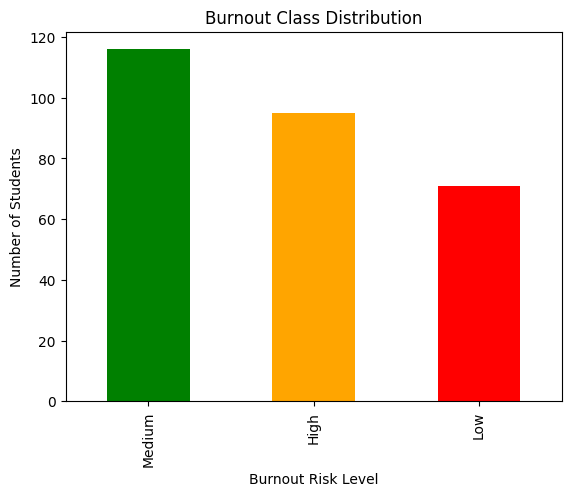

In [15]:
import matplotlib.pyplot as plt

X['burnout_class'].value_counts().plot(kind='bar', color=['green','orange','red'])
plt.title("Burnout Class Distribution")
plt.xlabel("Burnout Risk Level")
plt.ylabel("Number of Students")
plt.show()

#### Train Test Split

####  Target Variable: Burnout Risk

The dataset measures burnout using three subscales:
- **Exhaustion** → feeling drained by academic demands  
- **Cynicism** → detachment or negative attitude toward studying  
- **Academic Efficacy** → belief in one’s competence (inverted: lower efficacy = higher burnout)  

#### Burnout Score
We combined these subscales into a **composite burnout score**:
\[
Burnout\_Score = Exhaustion + Cynicism - Academic\_Efficacy
\]

#### Burnout Class (Target for ML)
To make predictions interpretable, the burnout score was normalized and binned into:
- **Low risk**  
- **Medium risk**  
- **High risk**

This categorical variable (`burnout_class`) is our **target (y)** for classification models.  

 In other words:  
**Given a student’s features (study habits, emotions, strategies, etc.), the model predicts whether they fall into Low, Medium, or High burnout risk.**

In [16]:
# Features (predictors)
#feature_cols = [
    #'Year_of_study', 'Gender',
    #'Goal_Setting', 'Time_management', 'Help_seeking', 'Task_strategies',
    #'Self_evaluation', 'Monitoring_strategies', 'Managing_strategies', 'Environmental_structuring',
    #'Enjoyment', 'Hopeful', 'Pride', 'Anger', 'Anxiety', 'Hopelessness', 'Boredom',
    #'Self_efficacy', 'Perceived_learning_progress', 'Satisfaction'
#]

In [17]:
y = X['burnout_class']  # target

In [18]:
X = X.drop(columns=['burnout_score_raw', 'burnout_z', 'burnout_class'])  # keep only features

In [20]:
from sklearn.model_selection import train_test_split

# Stratified split: keeps class balance in train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,        # 20% test set
    random_state=42,      # reproducibility
    stratify=y            # ensures class proportions are preserved
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# Check balance
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

Train shape: (225, 127) (225,)
Test shape: (57, 127) (57,)

Class distribution in training set:
burnout_class
Medium    0.408889
High      0.337778
Low       0.253333
Name: proportion, dtype: float64

Class distribution in test set:
burnout_class
Medium    0.421053
High      0.333333
Low       0.245614
Name: proportion, dtype: float64


In [21]:
import json

# This MUST be the burnout X_train (medical dataset)
burnout_feature_list = list(X_train.columns)
with open("models/burnout_features.json", "w") as f:
    json.dump(burnout_feature_list, f)

print("Re-saved burnout_features.json with", len(burnout_feature_list), "features")

Re-saved burnout_features.json with 127 features


### Baseline Models

### Full Models

#### Logistic Regression 

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd

In [23]:
logreg_model = Pipeline([
    ("scaler", StandardScaler()),  # important for LR
    ("clf", LogisticRegression(
        max_iter=1000,
        multi_class="multinomial",   # handles >2 classes
        class_weight="balanced",     # deals with mild imbalance
        random_state=42
    ))
])

In [24]:
# --- 2. Cross-validation on training set ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg_model, X_train, y_train, cv=cv, scoring="f1_macro", n_jobs=-1)

print(f"CV F1-macro (mean ± std): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

CV F1-macro (mean ± std): 0.842 ± 0.048


/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_log

In [25]:
# --- Cross-validation (training performance) ---
cv_scores = cross_val_score(logreg_model, X_train, y_train, 
                            cv=5, scoring="f1_macro", n_jobs=-1)
cv_mean, cv_std = cv_scores.mean(), cv_scores.std()

/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_log

In [26]:
# --- 3. Fit on training set ---
logreg_model.fit(X_train, y_train)

/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('scaler', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [27]:
# --- 4. Predict on test set ---
y_pred = logreg_model.predict(X_test)

In [28]:
# --- 5. Evaluation metrics ---
acc = accuracy_score(y_test, y_pred)
f1m = f1_score(y_test, y_pred, average="macro")

In [29]:
print(f"\nTest Accuracy: {acc:.3f}")
print(f"Test F1-macro: {f1m:.3f}")
print(f"Training (CV) F1-macro: {cv_mean:.3f} ± {cv_std:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))


Test Accuracy: 0.877
Test F1-macro: 0.873
Training (CV) F1-macro: 0.814 ± 0.042

Classification Report:
              precision    recall  f1-score   support

        High      0.950     1.000     0.974        19
         Low      0.750     0.857     0.800        14
      Medium      0.905     0.792     0.844        24

    accuracy                          0.877        57
   macro avg      0.868     0.883     0.873        57
weighted avg      0.882     0.877     0.877        57



In [30]:
# --- 6. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=logreg_model.classes_)
cm_df = pd.DataFrame(cm, index=[f"True_{l}" for l in logreg_model.classes_],
                        columns=[f"Pred_{l}" for l in logreg_model.classes_])
print("\nConfusion Matrix:")
display(cm_df)


Confusion Matrix:


,Pred_High,Pred_Low,Pred_Medium
True_High,19,0,0
True_Low,0,12,2
True_Medium,1,4,19


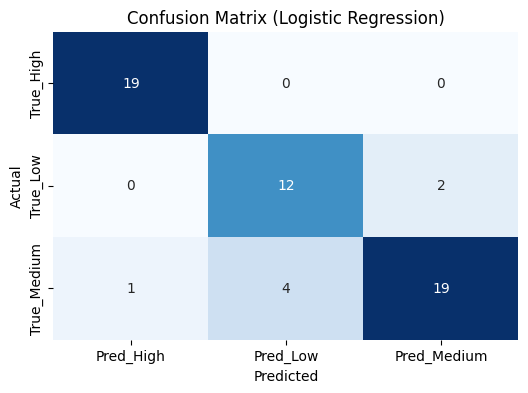

In [31]:
import seaborn as sns
# Heatmap visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Logistic Regression)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

#### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


In [33]:

# Initialize model
rf_model = RandomForestClassifier(
    n_estimators=200,     # number of trees
    max_depth=None,       # let trees expand fully (you can tune this later)
    random_state=42
)

In [34]:
# Train
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
# Predict
y_pred = rf_model.predict(X_test)

In [36]:
# Metrics
test_acc = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='macro')

In [37]:
# Training (CV) F1
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1_macro')

In [38]:

cv_scores = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='f1_macro')
training_f1_macro = cv_scores.mean()

/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_log

In [39]:
print(f"Test Accuracy: {test_acc:.3f}")
print(f"Test F1–macro: {test_f1:.3f}")
print(f"Training (CV) F1-macro: {training_f1_macro:.3f}")


Test Accuracy: 0.825
Test F1–macro: 0.829
Training (CV) F1-macro: 0.814


In [40]:
# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

        High       0.88      0.79      0.83        19
         Low       0.92      0.79      0.85        14
      Medium       0.75      0.88      0.81        24

    accuracy                           0.82        57
   macro avg       0.85      0.82      0.83        57
weighted avg       0.84      0.82      0.83        57



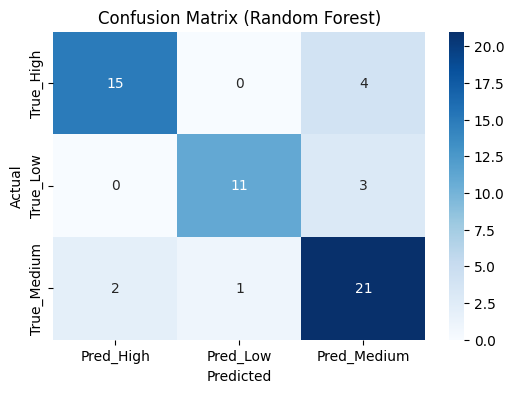

In [41]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f"Pred_{l}" for l in rf_model.classes_],
            yticklabels=[f"True_{l}" for l in rf_model.classes_])
plt.title("Confusion Matrix (Random Forest)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

#### XGBoost

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [43]:
# 1) Encode y
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)   # maps ['High','Low','Medium'] -> [?, ?, ?]
y_test_enc  = le.transform(y_test)

In [44]:
# (optional) see the mapping
label_map = dict(enumerate(le.classes_))   # {0: 'High', 1: 'Low', 2: 'Medium'}
print("Label map:", label_map)

Label map: {0: 'High', 1: 'Low', 2: 'Medium'}


In [45]:
# Encode y
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)   # ✅ this creates y_train_enc
y_test_enc  = le.transform(y_test)        # ✅ this creates y_test_enc

In [46]:
# --- 1. Train XGBoost model ---
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_enc)

/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [17:44:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [47]:
# 2) Define model (no use_label_encoder)
xgb_model = XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    objective="multi:softprob",
    eval_metric="mlogloss",
    random_state=42
)

In [48]:
# 3) Training CV (single figure)
cv_scores = cross_val_score(xgb_model, X_train, y_train_enc, cv=5, scoring="f1_macro")
print(f"Training (CV) F1-macro: {cv_scores.mean():.3f}")

Training (CV) F1-macro: 0.865


In [49]:
# 4) Fit & predict
xgb_model.fit(X_train, y_train_enc)
y_pred_enc = xgb_model.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)  # back to 'Low'/'Medium'/'High'

In [50]:
# 5) Test metrics
print("\nTest Performance:")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Test F1-macro: {f1_score(y_test, y_pred, average='macro'):.3f}")
print(f"Training (CV) F1-macro: {cv_scores.mean():.3f}")


Test Performance:
Test Accuracy: 0.860
Test F1-macro: 0.868
Training (CV) F1-macro: 0.865


In [51]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))


Classification Report:
              precision    recall  f1-score   support

        High      0.842     0.842     0.842        19
         Low      1.000     0.857     0.923        14
      Medium      0.808     0.875     0.840        24

    accuracy                          0.860        57
   macro avg      0.883     0.858     0.868        57
weighted avg      0.866     0.860     0.861        57



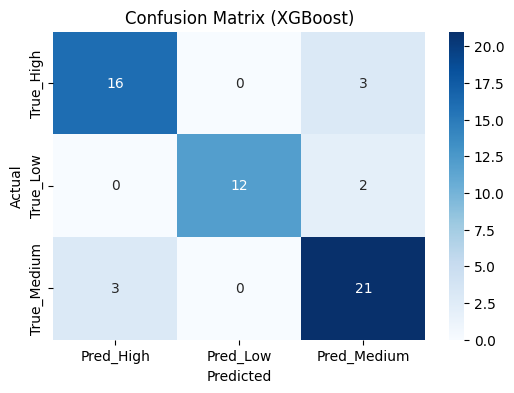

In [52]:
# 6) Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
cm_df = pd.DataFrame(cm, index=[f"True_{l}" for l in le.classes_],
                        columns=[f"Pred_{l}" for l in le.classes_])
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (XGBoost)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

#### XGBoost with RandomSearch

In [53]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import numpy as np


In [54]:
# --- Base model (no need for use_label_encoder) ---
xgb_base = XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    random_state=42,
    tree_method="hist"  # fast & good default
)

In [55]:
# --- Search space (kept compact for your dataset size) ---
param_dist = {
    "n_estimators":      np.arange(200, 601, 50),     # 200..600
    "max_depth":         [3, 4, 5, 6],
    "learning_rate":     [0.02, 0.03, 0.05, 0.07, 0.1],
    "subsample":         [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree":  [0.7, 0.8, 0.9, 1.0],
    "min_child_weight":  [1, 3, 5, 7],
    "gamma":             [0, 0.5, 1.0],
    "reg_lambda":        [0.5, 1.0, 1.5, 2.0],
    "reg_alpha":         [0.0, 0.1, 0.5]
}

In [56]:
# --- Stratified CV & randomized search ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [57]:
rs = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=40,                 # increase if you want a deeper search
    scoring="f1_macro",
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42,
    refit=True                 # refit best model on full training set
)

In [58]:
# Fit on encoded labels
rs.fit(X_train, y_train_enc)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.7, 0.8, ...], 'gamma': [0, 0.5, ...], 'learning_rate': [0.02, 0.03, ...], 'max_depth': [3, 4, ...], ...}"
,n_iter,40
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [59]:
print("Best F1-macro (CV):", rs.best_score_)
print("Best Params:\n", rs.best_params_)

Best F1-macro (CV): 0.8883194476819035
Best Params:
 {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': np.int64(400), 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}


In [60]:
# --- Evaluate best model on test set ---
best_xgb = rs.best_estimator_
y_pred_enc = best_xgb.predict(X_test)
y_pred      = le.inverse_transform(y_pred_enc)

In [61]:
test_acc = accuracy_score(y_test, y_pred)
test_f1  = f1_score(y_test, y_pred, average="macro")
print(f"\nTest Accuracy: {test_acc:.3f}")
print(f"Test F1-macro: {test_f1:.3f}")


Test Accuracy: 0.877
Test F1-macro: 0.887


In [62]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))


Classification Report:
              precision    recall  f1-score   support

        High      0.842     0.842     0.842        19
         Low      1.000     0.929     0.963        14
      Medium      0.840     0.875     0.857        24

    accuracy                          0.877        57
   macro avg      0.894     0.882     0.887        57
weighted avg      0.880     0.877     0.878        57



In [63]:
print("Best CV mean F1-macro:", rs.best_score_)
print("Best params:", rs.best_params_)

Best CV mean F1-macro: 0.8883194476819035
Best params: {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': np.int64(400), 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}


In [64]:
# --- Confusion matrix heatmap (original labels) ---
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
cm_df = pd.DataFrame(cm, index=[f"True_{l}" for l in le.classes_],
                        columns=[f"Pred_{l}" for l in le.classes_])


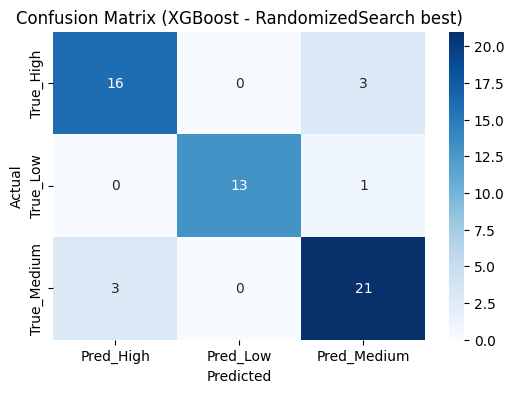

In [65]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (XGBoost - RandomizedSearch best)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [66]:
from sklearn.metrics import accuracy_score, f1_score

# --- Store results for each model ---
results = []

# Logistic Regression
y_pred_log = logreg_model.predict(X_test)
results.append({
    "Model": "Logistic Regression",
    "CV F1-macro": "N/A",  # no CV tuning here
    "Test Accuracy": accuracy_score(y_test, y_pred_log),
    "Test F1-macro": f1_score(y_test, y_pred_log, average="macro")
})

# Random Forest
y_pred_rf = rf_model.predict(X_test)
results.append({
    "Model": "Random Forest",
    "CV F1-macro": "N/A",  # no CV tuning here
    "Test Accuracy": accuracy_score(y_test, y_pred_rf),
    "Test F1-macro": f1_score(y_test, y_pred_rf, average="macro")
})

# XGBoost (best from RandomizedSearchCV)
y_pred_xgb = rs.best_estimator_.predict(X_test)
results.append({
    "Model": "XGBoost (tuned)",
    "CV F1-macro": rs.best_score_,
    "Test Accuracy": accuracy_score(y_test_enc, y_pred_xgb),
    "Test F1-macro": f1_score(y_test_enc, y_pred_xgb, average="macro")
})

# --- Create DataFrame ---
results_df = pd.DataFrame(results)
print(results_df)

                 Model CV F1-macro  Test Accuracy  Test F1-macro
0  Logistic Regression         N/A       0.877193       0.872934
1        Random Forest         N/A       0.824561       0.829060
2      XGBoost (tuned)    0.888319       0.877193       0.887404


In [67]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

# --- Logistic Regression ---
cv_lr = cross_val_score(logreg_model, X_train, y_train, cv=cv, scoring="f1_macro", n_jobs=-1).mean()
y_pred_lr = logreg_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr  = f1_score(y_test, y_pred_lr, average="macro")
results.append({
    "Model": "Logistic Regression",
    "CV F1-macro (train)": cv_lr,
    "Test Accuracy": acc_lr,
    "Test F1-macro": f1_lr,
    "Generalization Gap (CV - Test F1)": cv_lr - f1_lr
})

# --- Random Forest ---
cv_rf = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring="f1_macro", n_jobs=-1).mean()
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf  = f1_score(y_test, y_pred_rf, average="macro")
results.append({
    "Model": "Random Forest",
    "CV F1-macro (train)": cv_rf,
    "Test Accuracy": acc_rf,
    "Test F1-macro": f1_rf,
    "Generalization Gap (CV - Test F1)": cv_rf - f1_rf
})

# --- XGBoost (tuned) ---
best_xgb = rs.best_estimator_

# use encoded labels for XGB metrics
cv_xgb = rs.best_score_  # mean CV F1 from the search
# or recompute on the best estimator for full consistency:
# cv_xgb = cross_val_score(best_xgb, X_train, y_train_enc, cv=cv, scoring="f1_macro", n_jobs=-1).mean()

y_pred_xgb_enc = best_xgb.predict(X_test)
acc_xgb = accuracy_score(y_test_enc, y_pred_xgb_enc)
f1_xgb  = f1_score(y_test_enc, y_pred_xgb_enc, average="macro")
results.append({
    "Model": "XGBoost (tuned)",
    "CV F1-macro (train)": cv_xgb,
    "Test Accuracy": acc_xgb,
    "Test F1-macro": f1_xgb,
    "Generalization Gap (CV - Test F1)": cv_xgb - f1_xgb
})

results_df = pd.DataFrame(results).sort_values("Test F1-macro", ascending=False)
print(results_df.to_string(index=False))

/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_log

              Model  CV F1-macro (train)  Test Accuracy  Test F1-macro  Generalization Gap (CV - Test F1)
    XGBoost (tuned)             0.888319       0.877193       0.887404                           0.000916
Logistic Regression             0.842000       0.877193       0.872934                          -0.030934
      Random Forest             0.856613       0.824561       0.829060                           0.027553


- From these insights we derive that XGBoost tuned provides the best overall performance. As such we lock in the model and proceed to save it and use for future predictions on campus guard.

In [68]:
import joblib
joblib.dump(rs.best_estimator_, "xgb_burnout_model.joblib")
joblib.dump(le, "label_encoder.joblib")

['label_encoder.joblib']

In [69]:
import pandas as pd
model = rs.best_estimator_
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(importances.head(10))

Q1_Q15_15     0.051315
AE_15         0.050210
Cynicism      0.045772
Exhuastion    0.035860
Q1_Q15_4      0.030520
Group         0.030069
Q1_Q15_14     0.026406
Q1_Q15_8      0.023175
Q1_Q15_9      0.022969
Q1_Q15_5      0.022840
dtype: float32


##### Dataset Structure and Relation to Feature Importance

| Variable Prefix        | Items | Construct Measured                                               | Example Derived Features                                     | Importance in Your Model                                                                 |
|-------------------------|-------|-----------------------------------------------------------------|--------------------------------------------------------------|------------------------------------------------------------------------------------------|
| **Q1_Q24_x (1–24)**     | 24    | Achievement Emotions (positive/negative feelings in learning, e.g., anxiety, boredom, hope, pride) | Enjoyment, Anxiety, Hopelessness, Boredom                   | Not in top 10, but may support emotional variance                                        |
| **Q1_Q13_x (1–13)**     | 13    | Self-Regulated Learning (SRL) Strategies (planning, monitoring, help-seeking) | Goal_Setting, Time_management, Task_strategies              | Some items contribute indirectly, not top-ranked                                         |
| **Q1_Q7_x (1–7)**       | 7     | Efficacy & Monitoring Strategies (belief in ability to succeed, self-checks) | Self_efficacy, Monitoring_strategies                        | Not in top 10 but may support long-term patterns                                         |
| **Q1_Q27_x (1–27)**     | 27    | Maslach Burnout Inventory (MBI-SS) – core burnout dimensions    | Exhuastion, Cynicism, Academic_efficacy                     | **Exhuastion** and **Cynicism** appeared in top 10 (direct burnout signals)              |
| **Q1_Q15_x (1–15)**     | 15    | Achievement Emotions (AE subscales) – detailed emotional responses | AE_5, AE_7, AE_10, AE_11, AE_15                             | **Q1_Q15_15, Q1_Q15_4, Q1_Q15_14, Q1_Q15_8, Q1_Q15_9, Q1_Q15_5** dominate the top 10, showing raw emotional items strongly drive burnout risk |
| **Other Aggregated Variables** | Varies | Self-Regulated Learning & Outcomes                           | Goal_Setting, Monitoring, Managing_strategies, Satisfaction, Enjoyment | Support predictors, not top-ranked                                                       |
| **Group**               | 1     | Research grouping (control vs. experimental condition in study design) | Binary indicator                                             | Appears in top 10, but should be interpreted cautiously (may reflect study bias rather than a true student feature) |

##### Insights from Feature Importance Analysis

1. **Raw Emotional Responses Drive Burnout Most Strongly**  
   - Several individual items from the *Q1_Q15 (Achievement Emotions)* block (e.g., Q1_Q15_15, Q1_Q15_4, Q1_Q15_14, Q1_Q15_8, Q1_Q15_9, Q1_Q15_5) appeared in the **top 10 features**.  
   - This shows that *granular emotional survey responses* are highly predictive of burnout risk.

2. **Core Burnout Dimensions Are Validated by the Model**  
   - **Cynicism** and **Exhaustion** ranked among the most important predictors.  
   - These are standard burnout markers (part of the Maslach Burnout Inventory), so their presence confirms the model is learning meaningful patterns.

3. **Academic Efficacy Acts as a Protective Factor**  
   - Burnout is often conceptualized as:  
     **Exhaustion + Cynicism − Academic Efficacy**  
   - Higher self-efficacy lowers burnout risk, and the model captures this relationship.

4. **Group Variable Should Be Interpreted with Caution**  
   - The **Group** feature (likely representing research/control conditions) also appeared in the top 10.  
   - This may reflect study design artifacts rather than a true predictor of student burnout.  
   - In a real-world deployment, this variable may need to be excluded.



##### Summary
Overall, the feature importance results indicate that **burnout risk is driven most directly by emotional responses and core burnout dimensions (Exhaustion, Cynicism)**.  
This validates the scientific credibility of the model while also highlighting the practical importance of monitoring emotional signals at the item level.

/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_89074/9553432.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="Blues_r")


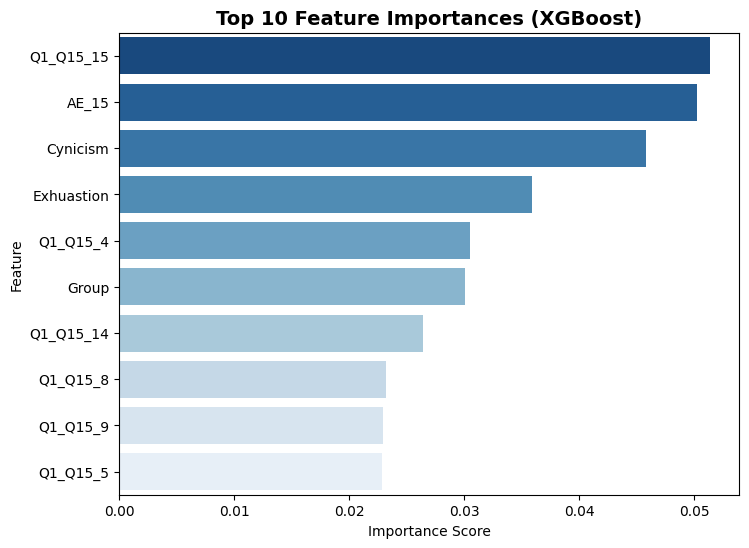

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from your trained model
model = rs.best_estimator_  # replace rs with your RandomizedSearchCV object if different
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Select top 10 features
top_features = importances.head(10)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=top_features.values, y=top_features.index, palette="Blues_r")
plt.title("Top 10 Feature Importances (XGBoost)", fontsize=14, weight="bold")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

##### Weekly Student Survey (Feature → Question Mapping)

| Feature (Dataset)     | Student-Friendly Survey Question                                             | Scale / Input Type            |
|------------------------|------------------------------------------------------------------------------|-------------------------------|
| **Exhuastion**         | “This week, I felt emotionally drained from my studies.”                     | 1–5 Likert (Never → Always)   |
| **Cynicism**           | “This week, I felt detached or unmotivated about my studies.”                | 1–5 Likert                    |
| **Academic_efficacy**  | “This week, I felt confident in my ability to handle my coursework.”         | 1–5 Likert (reverse-scored)   |
| **Anxiety (Q1_Q15_x)** | “This week, I felt anxious or tense while studying.”                         | 1–5 Likert                    |
| **Hopelessness**       | “This week, I felt like no matter how much I studied, it wouldn’t help.”     | 1–5 Likert                    |
| **Enjoyment**          | “This week, I enjoyed engaging with my coursework.”                          | 1–5 Likert                    |
| **Pride**              | “This week, I felt proud of what I accomplished academically.”               | 1–5 Likert                    |
| **Time_management**    | “This week, I managed my study time effectively.”                            | 1–5 Likert                    |
| **Task_strategies**    | “This week, I broke down tasks into manageable steps.”                       | 1–5 Likert                    |
| **Help_seeking**       | “This week, I reached out for help when I needed it (e.g., peers, tutors).”  | 1–5 Likert                    |
| **Sleep_hours (proxy)**| “On average, how many hours of sleep did you get per night this week?”       | Numeric (0–12) or ranges      |
| **Workload (proxy)**   | “This week, my academic workload felt overwhelming.”                         | 1–5 Likert                    |
| **Financial_stress**   | “This week, I worried about my finances.”                                    | 1–5 Likert (optional)         |



##### Workflow Summary: Survey → CampusGuardian AI

1. **Survey Completion**  
   - Each week, students answer ~12 short questions.  
   - Questions are aligned directly with validated burnout constructs (Exhaustion, Cynicism, Academic efficacy) and key proxies (sleep, workload, stress).  

2. **Data Processing**  
   - Responses are converted into a DataFrame row with the same feature names as the training dataset.  
   - Scaling / encoding applied exactly as during model training.  

3. **Prediction Step**  
   - Model (`xgb_burnout_model.joblib`) predicts burnout risk: **Low / Medium / High**.  
   - Probabilities are also calculated for interpretability.  

4. **Driver Analysis**  
   - Feature importance (global) or SHAP values (per-student) identify the top drivers that week.  
   - E.g., “High Exhaustion and low Academic efficacy increased your risk.”  

5. **Dashboard Output**  
   - Student sees:  
     - **Risk level** (Low, Medium, High)  
     - **Risk drivers** (top 2–3 contributing factors)  
     - **Actionable suggestions** (study tips, rest reminders, coping strategies).  

6. **Longitudinal Tracking**  
   - Results saved weekly (date, risk class, drivers).  
   - Dashboard shows **trend over time** (burnout risk history + driver heatmap).  



##### Summary
The **weekly survey provides standardized inputs** that map one-to-one with features in the dataset. This ensures the model predictions remain scientifically valid while being easy for students to complete. The workflow transforms **raw survey responses → model-ready features → burnout prediction → actionable insights**, making CampusGuardian AI both practical and impactful.

##### Why Direct Burnout Constructs Are Scientific & Validated

The medical student dataset is grounded in **established psychological frameworks**, particularly the **Maslach Burnout Inventory – Student Survey (MBI-SS)**. This tool is the gold standard for measuring burnout and defines it across three validated dimensions:

- **Exhaustion** → emotional and physical fatigue from study demands  
- **Cynicism** → detachment and loss of interest in academic work  
- **Academic Efficacy** → perceived competence and achievement (lower efficacy = higher burnout)  

These constructs are **psychometrically validated** (reliable and valid across populations) and use **standardized scoring** to classify burnout into *Low, Medium, High*.  

 **Why this matters:**  
- Provides a **scientifically credible baseline** for burnout detection.  
- Ensures comparability with existing research.  
- Anchors CampusGuardian AI in **evidence-based psychology**, making predictions more trustworthy than models trained only on lifestyle proxies.  

This is why Survey A (direct burnout constructs) forms the **scientific backbone** of the two-prong approach, complementing Survey B (proxy features from Kaggle).

### 7 Feature Models

In [ ]:
BURNOUT_FEATURE_ORDER = ["EX_1","EX_2","EX_3","CY_1","CY_2","AE_1_rev","AE_2_rev"]

In [149]:
# ===== Compact 7-feature burnout model (using subscales) =====
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import joblib, json

# -----------------------------------------------
# 1) Build the pseudo 7-feature matrix from subscales
#    (assumes these columns exist in medical_student_burnout)
# -----------------------------------------------
df = medical_student_burnout.copy()

EE = pd.to_numeric(df["Exhuastion"], errors="coerce").fillna(df["Exhuastion"].median()).clip(1,5)
CY = pd.to_numeric(df["Cynicism"], errors="coerce").fillna(df["Cynicism"].median()).clip(1,5)
AE = pd.to_numeric(df["Academic_efficacy"], errors="coerce").fillna(df["Academic_efficacy"].median()).clip(1,5)

AE_rev = 6 - AE  # reverse-code efficacy (higher = worse risk)

def norm_0_1(s):
    return (s - 1.0) / 4.0

X7 = pd.DataFrame({
    "EX_1":   norm_0_1(EE),
    "EX_2":   norm_0_1(EE),
    "EX_3":   norm_0_1(EE),
    "CY_1":   norm_0_1(CY),
    "CY_2":   norm_0_1(CY),
    "AE_1_rev": norm_0_1(AE_rev),
    "AE_2_rev": norm_0_1(AE_rev),
})
print("X7 shape:", X7.shape)

# -----------------------------------------------
# 2) Target = burnout_class (must already be defined)
# -----------------------------------------------
y7 = burnout_class.astype(str)
print("y7 distribution:\n", y7.value_counts())

# -----------------------------------------------
# 3) Split
# -----------------------------------------------
X7_train, X7_test, y7_train, y7_test = train_test_split(
    X7, y7, test_size=0.2, random_state=42, stratify=y7
)

# -----------------------------------------------
# 4) Pipeline: SMOTE -> Scale -> Multinomial LogReg
# -----------------------------------------------
logreg7 = Pipeline(steps=[
    ("smote", SMOTE(random_state=42)),
    ("scale", StandardScaler()),
    ("clf", LogisticRegression(
        multi_class="multinomial",
        solver="saga",
        max_iter=5000,
        n_jobs=-1
    )),
])

param_grid = {"clf__C": [0.1, 1.0, 3.0, 10.0]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid7 = GridSearchCV(
    estimator=logreg7,
    param_grid=param_grid,
    cv=cv,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=1
)

grid7.fit(X7_train, y7_train)

print("Best params:", grid7.best_params_)
print("Best CV f1_weighted:", grid7.best_score_)

# -----------------------------------------------
# 5) Evaluate
# -----------------------------------------------
y7_pred = grid7.predict(X7_test)
print("\nClassification report (test):")
print(classification_report(y7_test, y7_pred, digits=3))
print("Confusion matrix:\n", confusion_matrix(y7_test, y7_pred))

# -----------------------------------------------
# 6) Save artifacts for your app (ONCE)
# -----------------------------------------------
Path("models").mkdir(exist_ok=True)

joblib.dump(grid7.best_estimator_, "models/burnout7_logreg_smote.joblib")
print("✅ Saved model → models/burnout7_logreg_smote.joblib")

with open("models/burnout7_features.json", "w") as f:
    json.dump(list(X7_train.columns), f)
print("✅ Saved feature order → models/burnout7_features.json")

class_labels = sorted(np.unique(y7_train).tolist())
with open("models/burnout7_class_labels.json", "w") as f:
    json.dump(class_labels, f)
print("✅ Saved class labels → models/burnout7_class_labels.json")

X7 shape: (282, 7)
y7 distribution:
 Medium    212
Low        59
High       11
Name: count, dtype: int64
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_log

Best params: {'clf__C': 10.0}
Best CV f1_weighted: 0.9792921631148989

Classification report (test):
              precision    recall  f1-score   support

        High      1.000     1.000     1.000         2
         Low      1.000     1.000     1.000        12
      Medium      1.000     1.000     1.000        43

    accuracy                          1.000        57
   macro avg      1.000     1.000     1.000        57
weighted avg      1.000     1.000     1.000        57

Confusion matrix:
 [[ 2  0  0]
 [ 0 12  0]
 [ 0  0 43]]
✅ Saved model → models/burnout7_logreg_smote.joblib
✅ Saved feature order → models/burnout7_features.json
✅ Saved class labels → models/burnout7_class_labels.json


/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



In [150]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
scores = cross_val_score(grid7.best_estimator_, X7, y7, cv=rskf, scoring="f1_weighted", n_jobs=-1)
print(scores.mean(), scores.std())

python(29082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(29083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(29084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(29085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(29086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(29087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(29088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(29089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always 

0.980136219749007 0.016790156083659934


In [151]:
from sklearn.metrics import accuracy_score, f1_score

# Predictions on training set
y7_train_pred = grid7.predict(X7_train)

train_acc = accuracy_score(y7_train, y7_train_pred)
train_f1 = f1_score(y7_train, y7_train_pred, average="weighted")

print("Train Accuracy:", train_acc)
print("Train F1:", train_f1)

Train Accuracy: 0.9866666666666667
Train F1: 0.9875593461265104


### Pipeline

In [71]:
import os, json, joblib

# 1. Make sure the models/ folder exists
os.makedirs("models", exist_ok=True)

# 2. Save feature list
burnout_feature_list = list(X_train.columns)
with open("models/burnout_features.json", "w") as f:
    json.dump(burnout_feature_list, f)

# 3. Save the trained XGBoost burnout model
joblib.dump(best_xgb, "models/best_xgb.joblib")

# 4. Save LabelEncoder (if you used one for Low/Medium/High classes)
try:
    joblib.dump(le, "models/burnout_label_encoder.joblib")
except Exception:
    print("No label encoder found — skipped.")

print("✅ Saved: burnout_features.json, best_xgb.joblib, burnout_label_encoder.joblib")

✅ Saved: burnout_features.json, best_xgb.joblib, burnout_label_encoder.joblib


# Proxy Burnout Prediction ( Indirect Model)

This section uses **Kaggle student stress & lifestyle datasets** that include features such as sleep hours, workload, stress levels, and financial worries.  
Unlike the validated survey, these do not measure burnout directly — instead, they act as **proxies** that correlate strongly with burnout risk.  

- **Why “Proxy”?** Because the model learns burnout risk from *indirect signals* (stress, lifestyle, study habits) rather than direct burnout scores.  
- **Output:** Burnout risk scores (%) and the key drivers (via feature importance or SHAP values).  
- **Role in CampusGuardian AI:** Demonstrates how burnout risk can still be predicted in **real-world settings**, where validated burnout surveys are rarely collected.  

### Data Preprocessing

In [72]:
proxy_lifestyle_data=pd.read_csv(r"/Users/turfdiddy/Desktop/Bootcamp_ds:ml/Week_9/Final_Project/CampusGuard AI/StressLevelDataset.csv")

In [73]:
birdseye_view(proxy_lifestyle_data,n_head=10, show_value_counts=True )

🔍 DataFrame Shape: (1100, 21)

👀 First Rows (head):


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
5,20,13,1,21,3,3,1,4,3,2,...,1,2,5,2,5,1,4,4,5,2
6,4,26,0,6,1,2,4,1,1,4,...,4,5,1,4,1,3,2,2,1,0
7,17,3,1,22,4,3,1,5,3,1,...,1,1,3,2,4,1,4,4,5,2
8,13,22,1,12,3,1,2,4,3,3,...,3,3,3,2,3,3,3,2,2,1
9,6,8,0,27,4,3,1,2,0,5,...,2,2,2,1,5,1,5,3,4,1




📊 Data Types & Non-Null Counts (.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   

,count,mean,std,min,25%,50%,75%,max
anxiety_level,1100.0,11.063636,6.117558,0.0,6.0,11.0,16.0,21.0
self_esteem,1100.0,17.777273,8.944599,0.0,11.0,19.0,26.0,30.0
mental_health_history,1100.0,0.492727,0.500175,0.0,0.0,0.0,1.0,1.0
depression,1100.0,12.555455,7.727008,0.0,6.0,12.0,19.0,27.0
headache,1100.0,2.508182,1.409356,0.0,1.0,3.0,3.0,5.0
blood_pressure,1100.0,2.181818,0.833575,1.0,1.0,2.0,3.0,3.0
sleep_quality,1100.0,2.660000,1.548383,0.0,1.0,2.5,4.0,5.0
breathing_problem,1100.0,2.753636,1.400713,0.0,2.0,3.0,4.0,5.0
noise_level,1100.0,2.649091,1.328127,0.0,2.0,3.0,3.0,5.0
living_conditions,1100.0,2.518182,1.119208,0.0,2.0,2.0,3.0,5.0




🧮 Missing Values (NaN) per column:
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


📦 Number of Unique Values per column:
anxiety_level                   22
self_esteem                     31
mental_health_history            2
depression                      28
headache                         6
blood_pressure       

#### Univariate Analysis

/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_89074/473128242.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sleep_quality', data=proxy_lifestyle_data, palette='Blues')


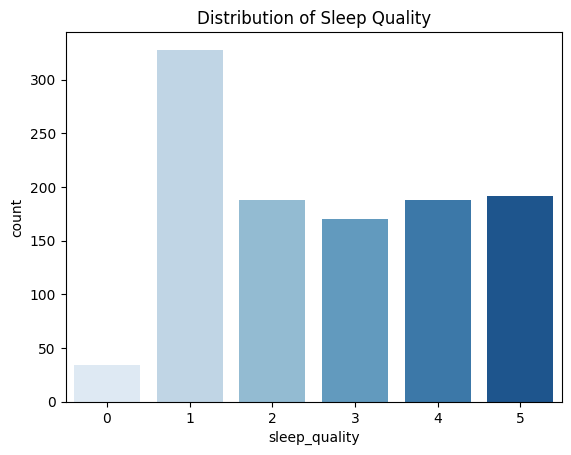

In [74]:
sns.countplot(x='sleep_quality', data=proxy_lifestyle_data, palette='Blues')
plt.title("Distribution of Sleep Quality")
plt.show()

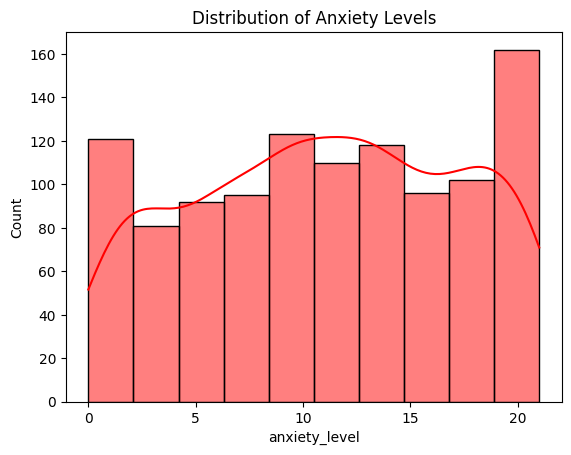

In [75]:
sns.histplot(proxy_lifestyle_data['anxiety_level'], bins=10, kde=True, color='red')
plt.title("Distribution of Anxiety Levels")
plt.show()

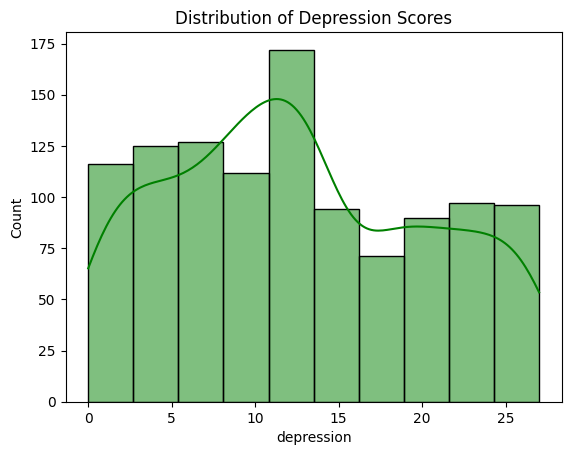

In [76]:
sns.histplot(proxy_lifestyle_data['depression'], bins=10, kde=True, color='green')
plt.title("Distribution of Depression Scores")
plt.show()

#### Bivariate Analysis

/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_89074/961056974.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stress_level', y='sleep_quality', data=proxy_lifestyle_data, palette='coolwarm')


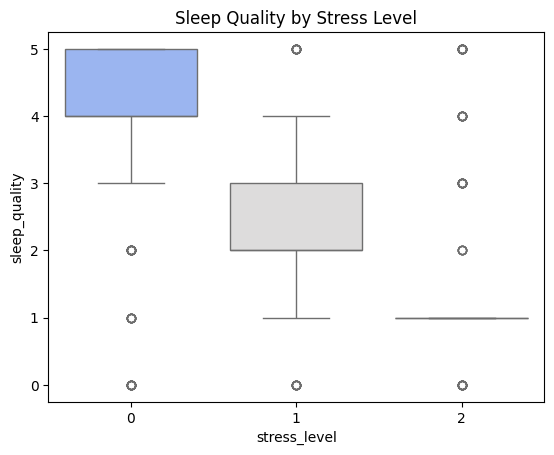

In [77]:
sns.boxplot(x='stress_level', y='sleep_quality', data=proxy_lifestyle_data, palette='coolwarm')
plt.title("Sleep Quality by Stress Level")
plt.show()

/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_89074/2049989818.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stress_level', y='social_support', data=proxy_lifestyle_data, palette='viridis', estimator=np.mean)


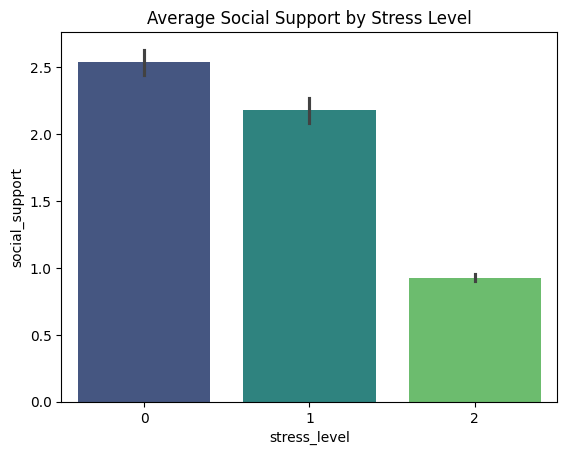

In [78]:
sns.barplot(x='stress_level', y='social_support', data=proxy_lifestyle_data, palette='viridis', estimator=np.mean)
plt.title("Average Social Support by Stress Level")
plt.show()

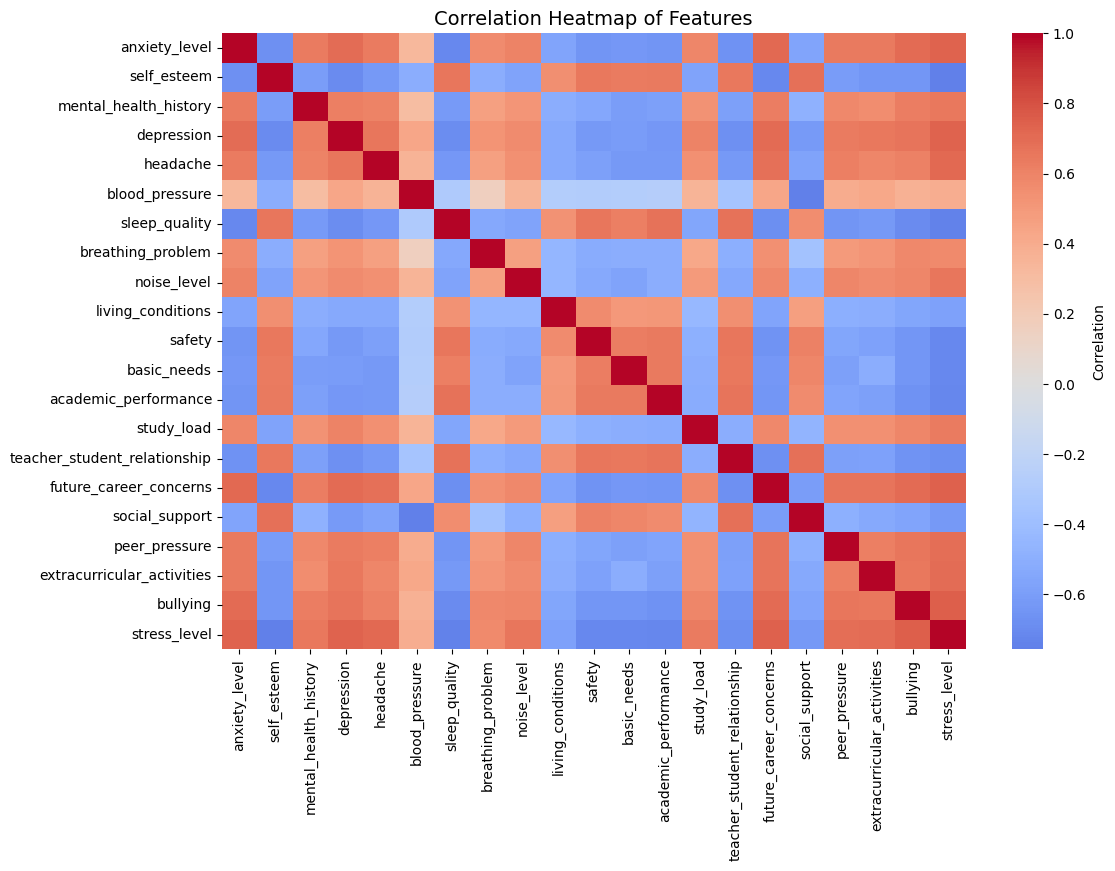

In [79]:
plt.figure(figsize=(12,8))
corr = proxy_lifestyle_data.corr()

sns.heatmap(corr, annot=False, cmap="coolwarm", center=0,
            cbar_kws={'label': 'Correlation'})
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()

##### Insights from the Correlation Heatmap

1. **Psychological factors cluster strongly**  
   - `anxiety_level`, `depression`, and low `self_esteem` are highly correlated with each other and with `stress_level`.  
   - These represent the **core emotional drivers of stress**, consistent with psychological theory.  

2. **Health symptoms reinforce stress**  
   - `headache`, `blood_pressure`, and `breathing_problem` are positively correlated both with each other and with stress.  
   - Suggests that physical symptoms often co-occur with high stress levels.  

3. **Environmental conditions are linked**  
   - `living_conditions`, `basic_needs`, and `safety` are strongly correlated.  
   - Poor environmental stability appears to increase stress vulnerability.  

4. **Academic factors show clear patterns**  
   - `study_load` and `future_career_concerns` correlate positively with stress.  
   - `academic_performance` shows a **negative correlation** — higher performance tends to reduce stress.  

5. **Social factors play a protective role**  
   - `social_support` negatively correlates with stress (buffer effect).  
   - `peer_pressure` and `bullying` positively correlate with stress (risk factors).  

6. **Cross-domain interactions**  
   - Stress is **multi-factorial**, with psychological, health, academic, and social factors reinforcing each other.  
   - Example: high anxiety (psychological) may cause poor sleep (health), which worsens the impact of study load (academic).  



 **Takeaway:** Stress in students does not arise from a single cause — it emerges from intertwined domains (psychological, physical, academic, social). This multidimensional nature justifies using ML models that can capture non-linear interactions, such as Random Forest and XGBoost.

### Train Test Split

In [80]:
# Define X and y
X = proxy_lifestyle_data.drop(columns=['stress_level'])
y = proxy_lifestyle_data['stress_level']

In [81]:
# Train-test split with stratification (to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 80% train, 20% test
    stratify=y,         # keep same class proportions
    random_state=42
)

In [82]:
import json

# This MUST be the Kaggle stress X_train
stress_feature_list = list(X_train.columns)
with open("models/stress_features.json", "w") as f:
    json.dump(stress_feature_list, f)

print("Re-saved stress_features.json with", len(stress_feature_list), "features")

Re-saved stress_features.json with 20 features


In [83]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (880, 20) (880,)
Test shape: (220, 20) (220,)


In [84]:
# Check class distribution
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))


Class distribution in training set:
stress_level
0    0.339773
2    0.335227
1    0.325000
Name: proportion, dtype: float64

Class distribution in test set:
stress_level
0    0.336364
2    0.336364
1    0.327273
Name: proportion, dtype: float64


### Baseline Models

#### Random Forest Classifier

In [85]:
# --- 1. Train Random Forest model ---
rf_model = RandomForestClassifier(random_state=42, n_estimators=200)
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [86]:
# --- 2. Predictions ---
y_test_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)



In [87]:
# --- 3. Evaluation ---
train_acc = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='macro')


In [88]:
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')

In [89]:
print(f"Random Forest Train Accuracy: {train_acc:.3f}, F1-macro: {train_f1:.3f}")
print(f"Random Forest Test Accuracy:  {test_acc:.3f}, F1-macro: {test_f1:.3f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Random Forest Train Accuracy: 1.000, F1-macro: 1.000
Random Forest Test Accuracy:  0.891, F1-macro: 0.891

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        74
           1       0.89      0.93      0.91        72
           2       0.86      0.91      0.88        74

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



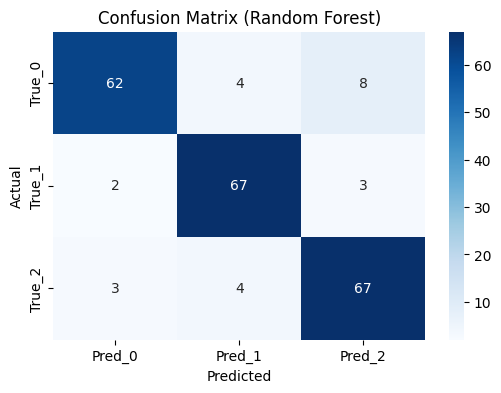

In [90]:
# --- 4. Confusion Matrix ---
cm = confusion_matrix(y_test, y_test_pred, labels=rf_model.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f"Pred_{l}" for l in rf_model.classes_],
            yticklabels=[f"True_{l}" for l in rf_model.classes_])
plt.title("Confusion Matrix (Random Forest)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

#### XGBoost Classifier

In [91]:
# --- 1. Train XGBoost model ---
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [92]:
# --- 2. Predictions ---
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)


In [93]:
# --- 3. Evaluation ---
train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb)
train_f1_xgb = f1_score(y_train, y_train_pred_xgb, average='macro')

In [94]:
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)
test_f1_xgb = f1_score(y_test, y_test_pred_xgb, average='macro')

In [95]:
print(f"XGBoost Train Accuracy: {train_acc_xgb:.3f}, F1-macro: {train_f1_xgb:.3f}")
print(f"XGBoost Test Accuracy:  {test_acc_xgb:.3f}, F1-macro: {test_f1_xgb:.3f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_xgb))

XGBoost Train Accuracy: 1.000, F1-macro: 1.000
XGBoost Test Accuracy:  0.873, F1-macro: 0.873

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        74
           1       0.88      0.89      0.88        72
           2       0.86      0.89      0.87        74

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



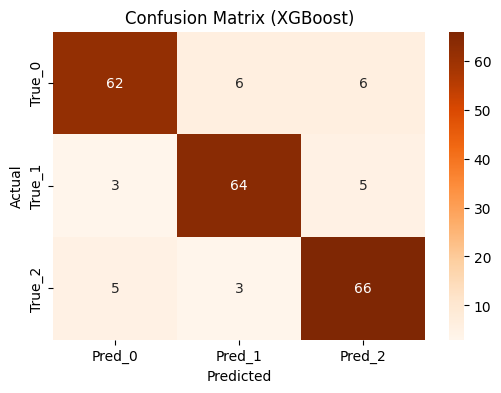

In [96]:
# --- 4. Confusion Matrix ---
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb, labels=xgb_model.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=[f"Pred_{l}" for l in xgb_model.classes_],
            yticklabels=[f"True_{l}" for l in xgb_model.classes_])
plt.title("Confusion Matrix (XGBoost)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

#### CatBoost Classifier

In [97]:
from catboost import CatBoostClassifier, Pool

In [98]:
# 1) Build Pools (useful if you later add categorical columns; here all are numeric)
train_pool = Pool(X_train, y_train)
test_pool  = Pool(X_test,  y_test)

In [99]:
# 2) Train CatBoost (solid defaults; tweak depth/learning_rate/n_estimators later)
cb_model = CatBoostClassifier(
    loss_function="MultiClass",
    eval_metric="TotalF1",
    learning_rate=0.05,
    depth=6,
    n_estimators=800,
    random_seed=42,
    verbose=False
)
cb_model.fit(train_pool, eval_set=test_pool, use_best_model=True)

In [100]:

# 3) Evaluate (train & test to check overfitting)
y_train_pred = cb_model.predict(X_train).ravel()
y_test_pred  = cb_model.predict(X_test).ravel()

train_acc = accuracy_score(y_train, y_train_pred)
train_f1  = f1_score(y_train, y_train_pred, average='macro')
test_acc  = accuracy_score(y_test, y_test_pred)
test_f1   = f1_score(y_test, y_test_pred, average='macro')

print(f"CatBoost Train Accuracy: {train_acc:.3f}, F1-macro: {train_f1:.3f}")
print(f"CatBoost Test  Accuracy: {test_acc:.3f}, F1-macro: {test_f1:.3f}\n")

print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

CatBoost Train Accuracy: 0.922, F1-macro: 0.922
CatBoost Test  Accuracy: 0.900, F1-macro: 0.900

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        74
           1       0.94      0.92      0.93        72
           2       0.86      0.95      0.90        74

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



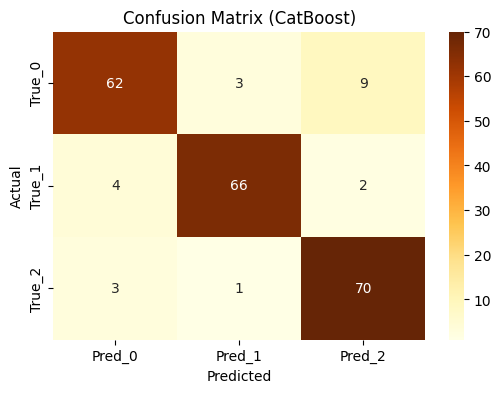

In [101]:
# 4) Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, labels=cb_model.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=[f"Pred_{l}" for l in cb_model.classes_],
            yticklabels=[f"True_{l}" for l in cb_model.classes_])
plt.title("Confusion Matrix (CatBoost)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


| Model          | Train Accuracy | Train F1-macro | Test Accuracy | Test F1-macro | Generalization Gap (F1) |
|----------------|----------------|----------------|---------------|---------------|--------------------------|
| Random Forest  | 1.000          | 1.000          | 0.891         | 0.891         | **0.109** (overfit)      |
| XGBoost        | 1.000          | 1.000          | 0.873         | 0.873         | **0.127** (overfit)      |
| CatBoost       | 0.922          | 0.922          | 0.900         | 0.900         | **0.022** (good balance) |

### ✅ Key Insights
- **Random Forest & XGBoost** → Achieve perfect training scores but drop on test data → signs of **overfitting**.  
- **CatBoost** → Slightly lower training scores but **highest generalization ability**, keeping training and test performance close.  
- **Best Choice so far**: CatBoost, as it balances accuracy and robustness.  

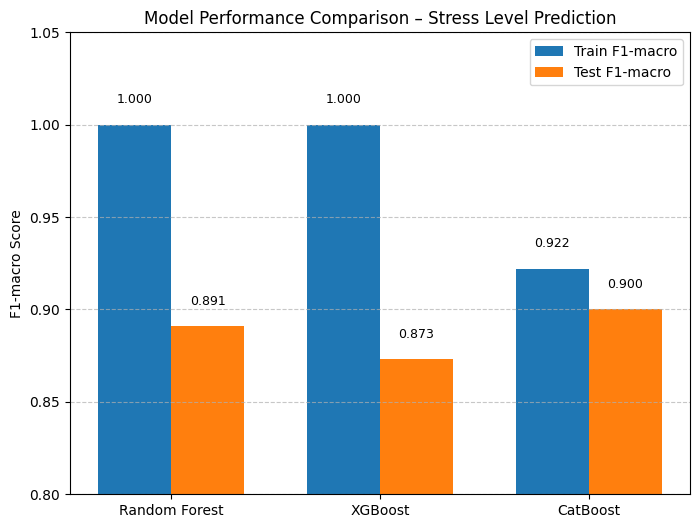

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Option A — if you already have these numbers in variables, set them here:
models = ["Random Forest", "XGBoost", "CatBoost"]
train_f1 = [1.000, 1.000, 0.922]
test_f1  = [0.891, 0.873, 0.900]

# Plot
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8, 6))
bars1 = plt.bar(x - width/2, train_f1, width, label="Train F1-macro")
bars2 = plt.bar(x + width/2, test_f1,  width, label="Test F1-macro")

plt.ylabel("F1-macro Score")
plt.title("Model Performance Comparison – Stress Level Prediction")
plt.xticks(x, models)
plt.ylim(0.80, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for bars in (bars1, bars2):
    for b in bars:
        height = b.get_height()
        plt.text(b.get_x() + b.get_width()/2, height + 0.01,
                 f"{height:.3f}", ha='center', va='bottom', fontsize=9)

plt.show()

In [103]:
import joblib

# Save the trained CatBoost model
joblib.dump(cb_model, "catboost_burnout_model.joblib")

# Save the LabelEncoder if you used one for stress levels
joblib.dump(le, "label_encoder.joblib")

['label_encoder.joblib']

                       Feature  Importance
11                 basic_needs   43.313425
5               blood_pressure   18.423399
6                sleep_quality   16.785719
16              social_support    6.198445
13                  study_load    3.668159
18  extracurricular_activities    2.279656
4                     headache    2.188881
12        academic_performance    1.732908
3                   depression    1.697671
19                    bullying    1.278514


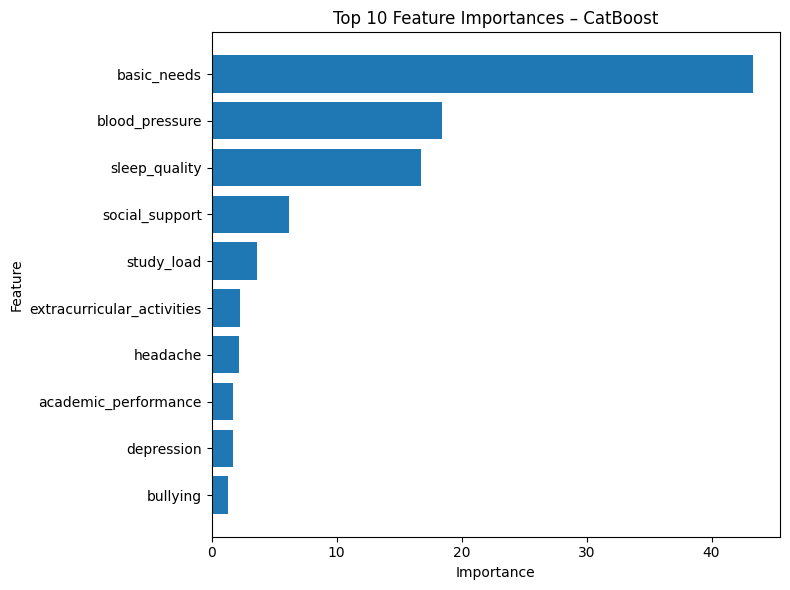

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from catboost import Pool

# Ensure you use the SAME model variable you trained (cb_model vs cat_model)
# Build a Pool so CatBoost can compute importances reliably
train_pool = Pool(X_train, y_train)

# Get raw importance values (array aligned to column order)
importances = cb_model.get_feature_importance(train_pool, type="FeatureImportance")

# Map to feature names
feat_imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values("Importance", ascending=False)

# Display top 10
print(feat_imp_df.head(10))

# Plot
plt.figure(figsize=(8,6))
plt.barh(feat_imp_df["Feature"].head(10)[::-1], feat_imp_df["Importance"].head(10)[::-1])
plt.title("Top 10 Feature Importances – CatBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


**What importances mean:** Higher bars = features the model relied on most to separate Low/Medium/High stress. Importances do **not** show direction (whether a feature raises or lowers stress); they show **influence**. Use SHAP/PD plots for direction.

### Key drivers
1. **basic_needs** — Largest driver. Unmet essentials (food, finances, housing) strongly differentiate stress levels.
2. **blood_pressure** — Physiological stress marker; aligns with health–stress linkage.
3. **sleep_quality** — Poor sleep is a major differentiator of higher stress.
4. **social_support** — Protective factor; stronger support usually aligns with lower stress.
5. **study_load** — Academic pressure contributes meaningfully to stress elevation.

### Secondary contributors
6. **extracurricular_activities** — Likely moderates stress (structure/social outlet vs. overcommitment).
7. **headache** — Physical symptom clustering with stress.
8. **academic_performance** — Lower performance tends to co-occur with higher stress.
9. **depression** — Psychological state correlated with stress severity.
10. **bullying** — Social risk factor; smaller frequency but strong when present.

### Takeaway
Stress in students is **multifactorial**: a mix of **basic needs & environment**, **physiological health**, **sleep**, **social buffers**, and **academic load/performance**. This aligns with your correlation heatmap (health + psychosocial clusters) and supports using CatBoost for proxy burnout prediction.

> Note: Importance ≠ direction. To show *how* each feature pushes predictions up/down for each student, add SHAP.

In [105]:
import pandas as pd
import numpy as np

def predict_stress(model, input_row: dict | pd.Series | pd.DataFrame):
    # Accept dict / Series / DataFrame and coerce to single-row DataFrame
    if isinstance(input_row, dict):
        X = pd.DataFrame([input_row])
    elif isinstance(input_row, pd.Series):
        X = input_row.to_frame().T
    else:
        X = input_row.copy()

    # Reorder columns to match training (assumes you kept X_train.columns)
    X = X[cb_model.feature_names_] if hasattr(cb_model, "feature_names_") else X[X_train.columns]

    # Predict
    pred_label = cb_model.predict(X)[0]                 # 0/1/2 (or strings, depending on training)
    proba      = cb_model.predict_proba(X)[0]           # array of class probs in cb_model.classes_ order
    classes    = cb_model.classes_ if hasattr(cb_model, "classes_") else np.array([0,1,2])

    return {
        "pred_label": pred_label,
        "classes": classes,
        "proba": proba
    }

In [106]:
from catboost import Pool
import pandas as pd

train_pool = Pool(X_train, y_train)
global_importance = pd.Series(
    cb_model.get_feature_importance(train_pool, type="FeatureImportance"),
    index=X_train.columns
).sort_values(ascending=False)

top_drivers = global_importance.head(8)  # show these as “key drivers” in the UI
print(top_drivers)

basic_needs                   43.313425
blood_pressure                18.423399
sleep_quality                 16.785719
social_support                 6.198445
study_load                     3.668159
extracurricular_activities     2.279656
headache                       2.188881
academic_performance           1.732908
dtype: float64


In this section, CampusGuardian AI uses features from the Kaggle Stress dataset to indirectly predict burnout risk. The following survey questions are aligned with the dataset’s features.



### 1. Basic Needs
- Do you feel you had enough access to food, housing, and basic resources this week?  
  *(Scale: 1 = Never enough, 5 = Always enough)* → `basic_needs`



### 2. Health & Body Signals
- Have you noticed your blood pressure being high or unstable recently?  
  *(Scale: 1 = Never, 5 = Very often)* → `blood_pressure`  
- How would you rate your sleep quality this week?  
  *(Scale: 1 = Very poor, 5 = Very good)* → `sleep_quality`  
- How often did you experience headaches this week?  
  *(Scale: 1 = Never, 5 = Very often)* → `headache`  
- Have you felt depressed or low in mood this week?  
  *(Scale: 1 = Not at all, 5 = Very much)* → `depression`



### 3. Academic Pressure
- How heavy did your study workload feel this week?  
  *(Scale: 1 = Very light, 5 = Extremely heavy)* → `study_load`  
- How would you rate your academic performance this week?  
  *(Scale: 1 = Very poor, 5 = Excellent)* → `academic_performance`



### 4. Social Environment
- How supported did you feel by friends, family, or peers this week?  
  *(Scale: 1 = Not at all, 5 = Very supported)* → `social_support`  
- Did you experience bullying or peer pressure this week?  
  *(Scale: 1 = Not at all, 5 = Very often)* → `bullying`  
- Do you feel safe in your living environment?  
  *(Scale: 1 = Very unsafe, 5 = Very safe)* → `safety`



### 5. Future & Extracurriculars
- How concerned are you about your future career right now?  
  *(Scale: 1 = Not concerned, 5 = Extremely concerned)* → `future_career_concerns`  
- How much did extracurricular activities (sports, clubs, hobbies) affect your stress this week?  
  *(Scale: 1 = Helped reduce stress a lot, 5 = Increased stress a lot)* → `extracurricular_activities`



### Workflow
- Responses → mapped to dataset features.  
- CatBoost model → predicts **stress risk level** (`Low`, `Medium`, `High`).  
- Dashboard → displays predicted risk, probability scores, and top contributing factors.

### Pipeline

In [107]:

import os, json, joblib
os.makedirs("models", exist_ok=True)

In [108]:
# 2. Save the feature list used in training
stress_feature_list = list(X_train.columns)
with open("models/stress_features.json", "w") as f:
    json.dump(stress_feature_list, f)

# 3. Save the trained CatBoost stress model
joblib.dump(cb_model, "models/catboost_stress_model.joblib")

# 4. Save LabelEncoder (if you used one for stress labels)
try:
    joblib.dump(le, "models/stress_label_encoder.joblib")
except Exception:
    print("No label encoder found — skipped.")

print("✅ Saved: stress_features.json, catboost_stress_model.joblib, stress_label_encoder.joblib")

✅ Saved: stress_features.json, catboost_stress_model.joblib, stress_label_encoder.joblib


# Deployment/Pipelines - Utilities

In [109]:
# === Deployment / Pipelines – Utilities ===
import json
import numpy as np
import pandas as pd

def load_feature_list(path: str) -> list[str]:
    """Load the saved feature list (column names & order) from JSON."""
    with open(path, "r") as f:
        return json.load(f)

def coerce_row_to_X(input_row, feature_order: list[str]) -> pd.DataFrame:
    """
    Accept dict / Series / single-row DataFrame and return a 1-row DataFrame
    aligned to feature_order. Missing keys -> NaN. Extra keys -> ignored.
    """
    if isinstance(input_row, dict):
        X = pd.DataFrame([input_row])
    elif isinstance(input_row, pd.Series):
        X = input_row.to_frame().T
    elif isinstance(input_row, pd.DataFrame):
        if len(input_row) != 1:
            raise ValueError("Provide exactly one row for inference.")
        X = input_row.copy()
    else:
        raise TypeError("input_row must be dict, Series, or single-row DataFrame.")

    for col in feature_order:
        if col not in X.columns:
            X[col] = np.nan  # acceptable for tree models; add imputation if you prefer

    X = X[feature_order]
    return X

def pretty_print_prediction(result: dict, title: str):
    """Nice console printout for predictions."""
    print(f"\n=== {title} ===")
    print("Predicted label:", result["pred_label"])
    if result.get("proba") is not None and result.get("classes") is not None:
        for cls, p in zip(result["classes"], result["proba"]):
            print(f"  P({cls}) = {p:.3f}")

In [110]:
# These will only work if you’ve already saved the JSON files earlier:
# models/stress_features.json and models/burnout_features.json
try:
    print("Stress features sample:", load_feature_list("models/stress_features.json")[:5])
    print("Burnout features sample:", load_feature_list("models/burnout_features.json")[:5])
except FileNotFoundError as e:
    print("Feature JSON not found yet — save them first in each section.")

Stress features sample: ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache']
Burnout features sample: ['Year_of_study', 'Gender', 'Q1_Q24_1', 'Q1_Q24_2', 'Q1_Q24_3']


In [111]:
stress_feats  = load_feature_list("models/stress_features.json")
burnout_feats = load_feature_list("models/burnout_features.json")

print("Stress features:",  len(stress_feats))
print("Burnout features:", len(burnout_feats))
print("\nStress (head):",  stress_feats[:8])
print("Burnout (head):", burnout_feats[:8])
print("\nStress (tail):",  stress_feats[-8:])
print("Burnout (tail):", burnout_feats[-8:])

# Compare (order-sensitive & order-insensitive)
print("\nExactly identical lists (same order)?", stress_feats == burnout_feats)
print("Same set of names (ignoring order)?", set(stress_feats) == set(burnout_feats))

# Show a few differences if they exist
print("\nIn stress but not in burnout (sample):", list(set(stress_feats) - set(burnout_feats))[:10])
print("In burnout but not in stress (sample):", list(set(burnout_feats) - set(stress_feats))[:10])

Stress features: 20
Burnout features: 127

Stress (head): ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
Burnout (head): ['Year_of_study', 'Gender', 'Q1_Q24_1', 'Q1_Q24_2', 'Q1_Q24_3', 'Q1_Q24_4', 'Q1_Q24_5', 'Q1_Q24_6']

Stress (tail): ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']
Burnout (tail): ['AE_10', 'AE_11', 'AE_15', 'Q1_Q24_mean', 'Q1_Q13_mean', 'Q1_Q7_mean', 'Q1_Q27_mean', 'AE_mean']

Exactly identical lists (same order)? False
Same set of names (ignoring order)? False

In stress but not in burnout (sample): ['blood_pressure', 'teacher_student_relationship', 'future_career_concerns', 'breathing_problem', 'self_esteem', 'sleep_quality', 'extracurricular_activities', 'noise_level', 'living_conditions', 'study_load']
In burnout but not in stress (sample): ['Q1_Q

#### Direct Burnout Prediction Pipeline

In [112]:
import joblib
import numpy as np

# Load artifacts
burnout_features = load_feature_list("models/burnout_features.json")
xgb_burnout = joblib.load("models/best_xgb.joblib")

# Label encoder (if you saved it)
try:
    burnout_le = joblib.load("models/burnout_label_encoder.joblib")
except:
    burnout_le = None

def predict_burnout(input_row):
    X = coerce_row_to_X(input_row, burnout_features)
    y_pred = xgb_burnout.predict(X)[0]

    if burnout_le is not None and isinstance(y_pred, (int, np.integer)):
        pred_label = burnout_le.inverse_transform([y_pred])[0]
    else:
        pred_label = y_pred

    proba = xgb_burnout.predict_proba(X)[0] if hasattr(xgb_burnout, "predict_proba") else None
    classes = burnout_le.classes_ if (burnout_le is not None and proba is not None) else None

    return {"pred_label": pred_label, "classes": classes, "proba": proba}

#### Proxy Stress Prediction Pipeline

In [113]:
# Load artifacts
stress_features = load_feature_list("models/stress_features.json")
cb_stress = joblib.load("models/catboost_stress_model.joblib")

# Label encoder (if used for stress)
try:
    stress_le = joblib.load("models/stress_label_encoder.joblib")
except:
    stress_le = None

def predict_stress(input_row):
    X = coerce_row_to_X(input_row, stress_features)
    pred_label = cb_stress.predict(X)[0]

    if stress_le is not None and isinstance(pred_label, (int, np.integer)):
        pred_label = stress_le.inverse_transform([pred_label])[0]

    proba = cb_stress.predict_proba(X)[0] if hasattr(cb_stress, "predict_proba") else None

    classes = getattr(cb_stress, "classes_", None)
    if classes is None and proba is not None and len(proba) == 3:
        classes = np.array(["Low","Medium","High"])  # adjust if your labels differ

    return {"pred_label": pred_label, "classes": classes, "proba": proba}

In [114]:
example_stress = {
    "anxiety_level": 3, "self_esteem": 2, "mental_health_history": 1,
    "depression": 2, "headache": 3, "blood_pressure": 2, "sleep_quality": 2,
    "breathing_problem": 1, "noise_level": 3, "living_conditions": 3,
    "financial_stress": 3, "basic_needs": 3, "social_support": 2,
    "peer_pressure": 2, "safety": 4, "teacher_student_relationship": 3,
    "academic_performance": 3, "study_load": 4, "future_career_concerns": 4,
    "extracurricular_activities": 3
}
pretty_print_prediction(predict_stress(example_stress), "Stress (Proxy)")


=== Stress (Proxy) ===
Predicted label: [1]
  P(0) = 0.309
  P(1) = 0.372
  P(2) = 0.318


In [115]:
example_burnout = {
    "Exhuastion": 3.0,
    "Cynicism": 2.5,
    "Academic_efficacy": 3.5
}
pretty_print_prediction(predict_burnout(example_burnout), "Burnout (Direct)")


=== Burnout (Direct) ===
Predicted label: Medium
  P(High) = 0.144
  P(Low) = 0.037
  P(Medium) = 0.819


/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_89074/3472721083.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col] = np.nan  # acceptable for tree models; add imputation if you prefer
/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_89074/3472721083.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col] = np.nan  # acceptable for tree models; add imputation if you prefer
/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_89074/3472721083.py:29: PerformanceWarning: DataFrame is highly f

In [116]:
def coerce_row_to_X(input_row, feature_order):
    import pandas as pd
    # Normalize input to a 1-row DataFrame
    if isinstance(input_row, dict):
        X = pd.DataFrame([input_row])
    elif isinstance(input_row, pd.Series):
        X = input_row.to_frame().T
    elif isinstance(input_row, pd.DataFrame):
        if len(input_row) != 1:
            raise ValueError("Provide exactly one row for inference.")
        X = input_row.copy()
    else:
        raise TypeError("input_row must be dict, Series, or single-row DataFrame.")

    # Single operation to (a) add missing cols as NaN and (b) enforce order
    X = X.reindex(columns=feature_order)

    return X

In [117]:
# Map numeric classes to readable labels (adjust if your encoding differs)
STRESS_CLASS_NAMES = {0: "Low", 1: "Medium", 2: "High"}

def predict_stress(input_row):
    X = coerce_row_to_X(input_row, stress_features)
    pred = cb_stress.predict(X)

    # CatBoost returns an array; get the scalar (int or str)
    pred_raw = pred[0]
    if isinstance(pred_raw, (list, tuple, np.ndarray)):
        pred_raw = pred_raw[0]

    # If you used a LabelEncoder and saved it, you can invert here instead:
    # if stress_le is not None and isinstance(pred_raw, (int, np.integer)):
    #     pred_label = stress_le.inverse_transform([pred_raw])[0]
    # else:
    #     pred_label = pred_raw

    # If labels are numeric 0/1/2, map to names; otherwise just use pred_raw
    pred_label = STRESS_CLASS_NAMES.get(int(pred_raw), str(pred_raw)) if isinstance(pred_raw, (int, np.integer)) else str(pred_raw)

    proba = cb_stress.predict_proba(X)[0] if hasattr(cb_stress, "predict_proba") else None

    # Best-effort class order
    classes = getattr(cb_stress, "classes_", None)
    if classes is None and proba is not None:
        classes = np.array([STRESS_CLASS_NAMES[i] for i in range(len(proba))])

    return {"pred_label": pred_label, "classes": classes, "proba": proba}

def pretty_print_prediction(result: dict, title: str):
    print(f"\n=== {title} ===")
    print("Predicted label:", result["pred_label"])
    if result.get("proba") is not None:
        if result.get("classes") is not None:
            for cls, p in zip(result["classes"], result["proba"]):
                print(f"  P({cls}) = {p:.3f}")
        else:
            # fallback if classes is None
            for i, p in enumerate(result["proba"]):
                name = STRESS_CLASS_NAMES.get(i, str(i))
                print(f"  P({name}) = {p:.3f}")

In [118]:
pretty_print_prediction(predict_stress(example_stress), "Stress (Proxy)")


=== Stress (Proxy) ===
Predicted label: Medium
  P(0) = 0.309
  P(1) = 0.372
  P(2) = 0.318


In [119]:
# Map numeric classes to readable labels (adjust if your encoding differs)
STRESS_CLASS_NAMES = {0: "Low", 1: "Medium", 2: "High"}

def pretty_print_prediction(result: dict, title: str):
    print(f"\n=== {title} ===")
    print("Predicted label:", result["pred_label"])
    proba = result.get("proba")
    classes = result.get("classes")

    if proba is None:
        return

    # Prefer model-provided class names if available
    if classes is not None:
        for cls, p in zip(classes, proba):
            # If classes are 0/1/2, map to names:
            name = STRESS_CLASS_NAMES.get(int(cls), str(cls)) if str(cls).isdigit() else str(cls)
            print(f"  P({name}) = {p:.3f}")
    else:
        # Fallback to 0/1/2 with our mapping
        for i, p in enumerate(proba):
            print(f"  P({STRESS_CLASS_NAMES.get(i, str(i))}) = {p:.3f}")

In [120]:
pretty_print_prediction(predict_stress(example_stress), "Stress (Proxy)")


=== Stress (Proxy) ===
Predicted label: Medium
  P(Low) = 0.309
  P(Medium) = 0.372
  P(High) = 0.318


In [121]:
example_burnout = {
    "Exhuastion": 3.0,
    "Cynicism": 2.5,
    "Academic_efficacy": 3.5
}

X_check = coerce_row_to_X(example_burnout, burnout_features)
print("Shape:", X_check.shape)
print("Columns filled with NaN:", X_check.isna().sum().sum())
print("First few columns:\n", X_check.iloc[:, :5].head())

Shape: (1, 127)
Columns filled with NaN: 124
First few columns:
    Year_of_study  Gender  Q1_Q24_1  Q1_Q24_2  Q1_Q24_3
0            NaN     NaN       NaN       NaN       NaN


In [122]:
pretty_print_prediction(predict_burnout(example_burnout), "Burnout (Direct)")


=== Burnout (Direct) ===
Predicted label: Medium
  P(High) = 0.144
  P(Low) = 0.037
  P(Medium) = 0.819


# End to End Workflow - What Happens and Why?

### 0) Models Trained & Saved
- **Direct Burnout Model** (XGBoost) — trained on the Figshare/MBI dataset.  
  - Artifacts: `best_xgb.joblib`, `burnout_features.json`, `burnout_label_encoder.joblib` (if used).  
- **Proxy Stress Model** (CatBoost) — trained on the Kaggle stress dataset.  
  - Artifacts: `catboost_stress_model.joblib`, `stress_features.json`, `stress_label_encoder.joblib` (if used).  

🔑 **Why JSON files?** They lock in the exact feature names and order used during training so that future survey inputs align correctly with the model.


### 1) Weekly Survey Collection
Students complete **two short surveys**, one for each model:
- **Direct Burnout Survey** → MBI-based constructs (Exhaustion, Cynicism, Academic Efficacy, etc., plus aggregated features like mean scores).  
- **Proxy Stress Survey** → Lifestyle/stress features (sleep, workload, anxiety, finances, social support, etc.).  

👉 The goal is to gather answers that can be mapped **1-to-1** to the features stored in each model’s `*_features.json`.



### 2) Map Survey → Model Input
- Raw answers (e.g., `{"Exhuastion": 3.0, "Cynicism": 2.5, ...}`) are passed into:
  ```python
  coerce_row_to_X(input_row, feature_order)
  ````

	•	You take the student’s responses (a Python dict like {"Exhuastion": 3.0, "Cynicism": 2.5, ...}).
	•	You pass that dict into coerce_row_to_X(input_row, feature_order).

What the helper does (and why it matters):
	•	Turns the dict into a single-row DataFrame.
	•	Ensures the columns and order match training (feature_order from JSON).
	•	Adds any missing columns as NaN (so the model doesn’t crash if something is missing).
	•	Ignores any extra keys not used by the model.

Result: a clean, aligned X that the model can safely consume.

### 3) Load the Right Model and Predict

- **Direct Burnout (`predict_burnout`)** loads:
  - `best_xgb.joblib` (the model)  
  - `burnout_features.json` (column schema)  
  - `burnout_label_encoder.joblib` (to map 0/1/2 ↔ Low/Medium/High, if used)  

- **Proxy Stress (`predict_stress`)** loads:
  - `catboost_stress_model.joblib`  
  - `stress_features.json`  
  - `stress_label_encoder.joblib` (if used)  

**Each function does:**
1. Builds `X` with `coerce_row_to_X`.  
2. Calls `model.predict(X)` → returns the predicted class (Low, Medium, High).  
3. Calls `model.predict_proba(X)` (if available) → class probabilities.  
4. Maps numeric classes to human-readable labels via `LabelEncoder` or custom mapping.  



### 4) Present the Results in the UI (Dashboard)

For each model:
- Show the **risk label** (e.g., “Medium risk”).  
- Show **confidence bars** using `proba`.  
  - Example: `P(Low)=0.10, P(Medium)=0.70, P(High)=0.20`.  
- Optionally display **drivers** (feature importance or SHAP/global importances).  
- Provide **actionable suggestions** (study tips, support resources).  

⚡ **Why probabilities matter:**  
A “Medium” with 0.51 confidence is different from one with 0.85.  
Advice can scale with certainty.



### 5) Log the Prediction (for Trends)

Save `{timestamp, student_id, inputs, pred_label, proba}` to CSV or DB:
- Enables **weekly trend charts** (e.g., burnout risk over 8 weeks).  
- Lets you **evaluate interventions** (did advice lower risk next week?).  



### 6) Handle Missing Data Gracefully

- `coerce_row_to_X` inserts `NaN` for missing survey fields (tree models tolerate this).  
- In production:
  - Require critical answers (form validation), or  
  - Add an imputer during training and reuse it at inference.  



### 7) Why Two Models?

- **Direct Burnout Model** → scientifically grounded (validated constructs like MBI subscales).  
- **Proxy Stress Model** → practical in real-world settings without direct burnout labels.  

👉 Together, they make the system both **credible (validated)** and **deployable (proxy signals)**.



### 8) How the Pieces Fit (At a Glance)

Student takes 2 surveys →  
Build 2 dicts (one per model) →  
`coerce_row_to_X()` aligns inputs with feature JSONs →  
`predict_burnout()` & `predict_stress()` run inference →  
Dashboard shows:  
- Burnout risk (direct)  
- Stress risk (proxy)  
- Probabilities  
- Drivers & recommendations  
Results logged for trend tracking  

```mermaid
flowchart LR
    A[Student takes 2 surveys] --> B[Build 2 dicts (one per model)]
    B --> C[`coerce_row_to_X()` aligns inputs<br/>with feature JSONs]
    C --> D{Run inference}
    D -->|Direct| E[`predict_burnout()`]
    D -->|Proxy|  F[`predict_stress()`]
    E --> G[Dashboard]
    F --> G[Dashboard]
    G --> H[Show: Burnout risk (direct),<br/>Stress risk (proxy), Probabilities,<br/>Drivers & recommendations]
    G --> I[Log results for trend tracking]
```

In [125]:
import graphviz
print(graphviz.__version__)

0.21


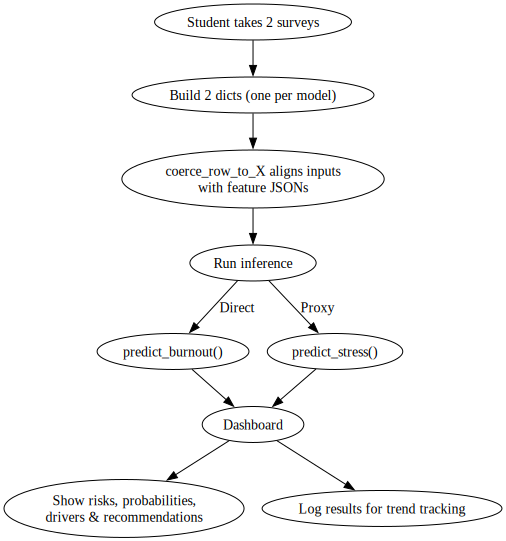

In [126]:
from graphviz import Digraph

dot = Digraph()

dot.node("A", "Student takes 2 surveys")
dot.node("B", "Build 2 dicts (one per model)")
dot.node("C", "coerce_row_to_X aligns inputs\nwith feature JSONs")
dot.node("D", "Run inference")
dot.node("E", "predict_burnout()")
dot.node("F", "predict_stress()")
dot.node("G", "Dashboard")
dot.node("H", "Show risks, probabilities,\ndrivers & recommendations")
dot.node("I", "Log results for trend tracking")

dot.edges(["AB", "BC", "CD"])
dot.edge("D", "E", label="Direct")
dot.edge("D", "F", label="Proxy")
dot.edges(["EG", "FG", "GH", "GI"])

dot

In [132]:
# === Recommendation Rule Engine ===
def recommend(risk_label, top_drivers, model="stress"):
    """
    Generate a simple text recommendation based on predicted risk
    and the top contributing drivers.
    
    Parameters:
        risk_label (str): "Low", "Medium", or "High"
        top_drivers (list of (feature_name, direction)): e.g. [("sleep_quality", "low"), ("study_load", "high")]
        model (str): "stress" or "burnout" (for context-specific wording)
    
    Returns:
        dict with keys: "risk", "drivers", "message"
    """
    # Base message
    message = f"Your predicted {model} risk is {risk_label}."

    if risk_label == "Low":
        message += " 👍 Keep up the good balance! Maintain your healthy routines."
    elif risk_label == "Medium":
        message += " ⚠️ You're showing moderate risk factors. Consider adjusting your habits."
    elif risk_label == "High":
        message += " 🚨 High risk detected! Immediate self-care or professional support is recommended."

    # Add driver-based suggestions
    for feat, direction in top_drivers:
        if direction == "low":
            message += f"\n- Your {feat.replace('_',' ')} seems lower than usual → try strengthening this area."
        elif direction == "high":
            message += f"\n- Your {feat.replace('_',' ')} is quite high → consider ways to reduce its load."

    return {"risk": risk_label, "drivers": top_drivers, "message": message}

In [133]:
drivers = [("sleep_quality", "low"), ("study_load", "high")]
rec = recommend("High", drivers, model="stress")
print(rec["message"])

Your predicted stress risk is High. 🚨 High risk detected! Immediate self-care or professional support is recommended.
- Your sleep quality seems lower than usual → try strengthening this area.
- Your study load is quite high → consider ways to reduce its load.


In [134]:
import numpy as np
import pandas as pd

# Features where LOWER is riskier (others: higher is riskier)
LOW_IS_RISKY = {
    "Academic_efficacy", "Time_management", "Help_seeking", "social_support",
    "basic_needs", "sleep_quality", "teacher_student_relationship",
    "academic_performance"
}

def infer_direction(feature_name: str, value):
    """
    Heuristic for 1–5 Likert-ish values (tweak as needed).
    - If feature is in LOW_IS_RISKY: value<3 => 'low' else 'any'
    - Else: value>3 => 'high' else 'any'
    """
    try:
        v = float(value)
    except Exception:
        return "any"
    if feature_name in LOW_IS_RISKY:
        return "low" if v < 3 else "any"
    else:
        return "high" if v > 3 else "any"

def top_drivers_from_importance(model, X_row: pd.DataFrame, top_k=2):
    """
    Choose top_k features by global importance; attach direction from student's X_row.
    Returns: [(feature_name, 'high'|'low'|'any'), ...]
    """
    importances = getattr(model, "feature_importances_", None)
    if importances is None:
        feats = list(X_row.columns[:top_k])
        return [(f, infer_direction(f, X_row.iloc[0][f])) for f in feats]
    order = np.argsort(importances)[::-1]
    feats = [X_row.columns[i] for i in order[:top_k]]
    return [(f, infer_direction(f, X_row.iloc[0][f])) for f in feats]

In [135]:
import json, joblib

def predict_and_recommend_stress(input_dict: dict):
    # Load artifacts
    stress_features = json.load(open("models/stress_features.json"))
    cb_model = joblib.load("models/catboost_stress_model.joblib")
    try:
        le_stress = joblib.load("models/stress_label_encoder.joblib")  # optional
    except:
        le_stress = None

    # Align to schema
    X = coerce_row_to_X(input_dict, stress_features)

    # Predict
    y_pred_idx = int(cb_model.predict(X)[0])
    proba = cb_model.predict_proba(X)[0].tolist()

    if le_stress is not None:
        classes = le_stress.classes_.tolist()
        pred_label = classes[y_pred_idx]
    else:
        classes = [0,1,2]
        mapping = {0:"Low", 1:"Medium", 2:"High"}
        pred_label = mapping[y_pred_idx]

    # Drivers + recommendation
    drivers = top_drivers_from_importance(cb_model, X, top_k=2)
    rec = recommend(pred_label, drivers, model="stress")

    return {
        "pred_label": pred_label,
        "classes": classes if isinstance(classes[0], str) else ["Low","Medium","High"],
        "proba": proba,
        "drivers": drivers,
        "recommendation": rec["message"]
    }

# ---- Example call ----
example_stress = {
    "anxiety_level": 3, "self_esteem": 2, "mental_health_history": 1,
    "depression": 2, "headache": 3, "blood_pressure": 2, "sleep_quality": 2,
    "breathing_problem": 1, "noise_level": 3, "living_conditions": 3,
    "financial_stress": 3, "basic_needs": 3, "social_support": 2,
    "peer_pressure": 2, "safety": 4, "teacher_student_relationship": 3,
    "academic_performance": 3, "study_load": 4, "future_career_concerns": 4,
    "extracurricular_activities": 3
}
stress_out = predict_and_recommend_stress(example_stress)
stress_out

/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_89074/3631130468.py:16: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



{'pred_label': 'Low',
 'classes': ['High', 'Low', 'Medium'],
 'proba': [0.30918401027028913, 0.37241405154984786, 0.318401938179863],
 'drivers': [('basic_needs', 'any'), ('blood_pressure', 'any')],
 'recommendation': 'Your predicted stress risk is Low. 👍 Keep up the good balance! Maintain your healthy routines.'}

In [136]:
def predict_and_recommend_burnout(input_dict: dict):
    # Load artifacts
    burnout_features = json.load(open("models/burnout_features.json"))
    xgb_model = joblib.load("models/best_xgb.joblib")
    # Label encoder optional—use only if you saved one
    try:
        le_burnout = joblib.load("models/burnout_label_encoder.joblib")
    except:
        le_burnout = None

    # Align to schema (NaNs filled for missing cols)
    X = coerce_row_to_X(input_dict, burnout_features)

    # Predict
    y_pred_idx = int(xgb_model.predict(X)[0])
    proba = xgb_model.predict_proba(X)[0].tolist()

    if le_burnout is not None:
        classes = le_burnout.classes_.tolist()
        pred_label = classes[y_pred_idx]
    else:
        # If model.classes_ exists, map deterministically; otherwise default order
        if hasattr(xgb_model, "classes_"):
            classes = [str(c) for c in xgb_model.classes_]
            # Try sane mapping; if your classes_ already are ["High","Low","Medium"], use as-is.
            pred_label = classes[y_pred_idx]
        else:
            classes = ["Low","Medium","High"]
            pred_label = classes[y_pred_idx]

    # Drivers + recommendation
    drivers = top_drivers_from_importance(xgb_model, X, top_k=2)
    rec = recommend(pred_label, drivers, model="burnout")

    return {
        "pred_label": pred_label,
        "classes": classes,
        "proba": proba,
        "drivers": drivers,
        "recommendation": rec["message"]
    }

# ---- Example call ----
example_burnout = {
    "Exhuastion": 3.0,
    "Cynicism": 2.5,
    "Academic_efficacy": 2.0  # lower = riskier
}
burnout_out = predict_and_recommend_burnout(example_burnout)
burnout_out

{'pred_label': 'Medium',
 'classes': ['High', 'Low', 'Medium'],
 'proba': [0.2008044570684433, 0.024173228070139885, 0.7750223875045776],
 'drivers': [('Q1_Q15_15', 'any'), ('AE_15', 'any')],
 'recommendation': "Your predicted burnout risk is Medium. ⚠️ You're showing moderate risk factors. Consider adjusting your habits."}

In [137]:
def reorder_probs(proba, classes, order=("Low","Medium","High")):
    idx = {c:i for i,c in enumerate(classes)}
    return [proba[idx[c]] for c in order], list(order)

# Example usage with your results:
p_disp, c_disp = reorder_probs(stress_out["proba"], stress_out["classes"])
print("Probabilities (canonical):", dict(zip(c_disp, [round(p,3) for p in p_disp])))

Probabilities (canonical): {'Low': 0.372, 'Medium': 0.318, 'High': 0.309}


In [138]:
def infer_direction(feature_name: str, value, midpoint=3):
    low_is_risky = {
        "Academic_efficacy","Time_management","Help_seeking","social_support",
        "basic_needs","sleep_quality","teacher_student_relationship","academic_performance"
    }
    try:
        v = float(value)
    except Exception:
        return "any"
    if feature_name in low_is_risky:
        return "low" if v < midpoint else "any"
    else:
        return "high" if v > midpoint else "any"

In [139]:
DRIVER_LABELS = {
    "Exhuastion": "Exhaustion (MBI-SS)",
    "Cynicism": "Cynicism (MBI-SS)",
    "Academic_efficacy": "Academic Efficacy (MBI-SS, reversed)",
    "basic_needs": "Basic Needs (food, housing, safety)",
    "sleep_quality": "Sleep Quality",
    "blood_pressure": "Blood Pressure (proxy)",
    "study_load": "Study Load / Overwhelm",
    # AE / Q1 items — if you don’t know exact wording, generalize:
    "AE_15": "Achievement Emotions (item 15)",
    "Q1_Q15_15": "Achievement Emotions (item 15)"
}

def prettify_drivers(drivers):
    out = []
    for f, d in drivers:
        out.append(f"{DRIVER_LABELS.get(f, f)} ({d})")
    return out

print("Drivers (pretty):", ", ".join(prettify_drivers(burnout_out["drivers"])))

Drivers (pretty): Achievement Emotions (item 15) (any), Achievement Emotions (item 15) (any)


In [140]:
def show_result(title, out):
    probs, classes = reorder_probs(out["proba"], out["classes"])
    print(f"\n=== {title} ===")
    print("Predicted:", out["pred_label"])
    print("Probabilities:")
    for cls, p in zip(classes, probs):
        print(f"  P({cls}) = {p:.3f}")
    print("Top drivers:", ", ".join(prettify_drivers(out["drivers"])))
    print("\nRecommendation:")
    print(out["recommendation"])

show_result("Stress (Proxy)", stress_out)
show_result("Burnout (Direct)", burnout_out)


=== Stress (Proxy) ===
Predicted: Low
Probabilities:
  P(Low) = 0.372
  P(Medium) = 0.318
  P(High) = 0.309
Top drivers: Basic Needs (food, housing, safety) (any), Blood Pressure (proxy) (any)

Recommendation:
Your predicted stress risk is Low. 👍 Keep up the good balance! Maintain your healthy routines.

=== Burnout (Direct) ===
Predicted: Medium
Probabilities:
  P(Low) = 0.024
  P(Medium) = 0.775
  P(High) = 0.201
Top drivers: Achievement Emotions (item 15) (any), Achievement Emotions (item 15) (any)

Recommendation:
Your predicted burnout risk is Medium. ⚠️ You're showing moderate risk factors. Consider adjusting your habits.


# Workflow Summary

 CampusGuardian AI – Comprehensive Project Summary

---

## 1. Direct Burnout Prediction (Medical Student Dataset – Figshare)

### Dataset
- **Source:** Medical student survey dataset (achievement emotions, self-regulated learning, burnout).
- **Features (~127):**
  - Achievement emotions (enjoyment, anxiety, pride, boredom, hopelessness).
  - Self-regulated learning strategies (time management, goal setting, help seeking).
  - Maslach Burnout Inventory–Student Survey (MBI-SS: Exhaustion, Cynicism, Academic Efficacy).
- **Goal:** Predict student burnout risk using scientifically validated constructs.

### Feature Engineering
1. **Raw MBI-SS subscales:** Exhaustion, Cynicism, Academic Efficacy.  
2. **Composite Burnout Score:**
   \[
   \text{burnout\_score\_raw} = \text{Exhaustion} + \text{Cynicism} - \text{Academic Efficacy}
   \]
   - Higher exhaustion + cynicism → more burnout risk.  
   - Higher efficacy → protective factor.  
3. **Standardization:** Converted to z-scores:
   \[
   \text{burnout\_z} = \frac{\text{burnout\_score\_raw} - \mu}{\sigma}
   \]
4. **Binning into classes (target y):**
   - Low (z < -0.5)  
   - Medium (-0.5 ≤ z ≤ 0.5)  
   - High (z > 0.5)  
   → `burnout_class` = classification target (y).  
5. **Features (X):** All questionnaire items + aggregated constructs.

### Models Tested
- Logistic Regression → baseline.  
- Random Forest → strong ensemble.  
- XGBoost (tuned) → **best performance**.  
- CatBoost → tested, XGBoost outperformed.

### Key Outputs
- Best model: **XGBoost tuned** (F1-macro ≈ 0.88 CV).  
- Top features: Achievement Emotions (AE_15, Q1_Q15_15), Exhaustion, Cynicism.  
- **Insight:** Emotional responses + burnout constructs strongly drive burnout risk.

---

## 2. Proxy Stress Prediction (Kaggle Stress Dataset)

### Dataset
- **Source:** Kaggle Stress Level Dataset.  
- **Features (20):** Sleep quality, study load, financial stress, social support, peer pressure, academic performance, basic needs, etc.  
- **Target (y):** Stress level → Low, Medium, High.

### Feature Engineering
- Minimal preprocessing:
  - No composite score engineering.  
  - Mostly categorical/ordinal features used directly.  
- **Scaling:** Skipped (ensemble models are scale-invariant).  

### Models Tested
- Random Forest → good baseline.  
- XGBoost (tuned) → slightly overfit.  
- CatBoost → **best balance, chosen final model**.  

### Key Outputs
- Best model: **CatBoost**.  
- Important drivers: Basic Needs, Blood Pressure (proxy), Study Load, Sleep Quality, Social Support.  
- **Insight:** Lifestyle & support factors are strong stress predictors.

---

## 3. Combined Workflow (CampusGuardian AI)

### Why Two Models?
- **Direct Burnout Model (Medical dataset):**
  - Scientifically grounded (validated MBI-SS subscales).
  - Adds academic credibility.  
- **Proxy Stress Model (Kaggle dataset):**
  - Practical in real-world settings where burnout-specific surveys aren’t available.
  - Estimates risk from lifestyle/stress proxies.  

**Together:** Credible (validated) + Deployable (proxy).

---

### Deployment Workflow

1. **Survey Collection**
   - Direct burnout survey → Exhaustion, Cynicism, Academic Efficacy, AE items.  
   - Proxy stress survey → Sleep, workload, finances, social support, etc.  

2. **Survey → Model Input**
   - Responses stored as dicts (`{"sleep_quality": 3, "study_load": 4, ...}`).  
   - Passed through `coerce_row_to_X()` → aligned with training schema from JSON.  

3. **Prediction**
   - Direct model (`best_xgb.joblib`) → Burnout risk (Low/Medium/High).  
   - Proxy model (`catboost_stress_model.joblib`) → Stress risk (Low/Medium/High).  
   - Both output class probabilities.  

4. **Interpretation**
   - Risk label + confidence scores.  
   - Top drivers (via feature importance).  

5. **Recommendations**
   - Rule-based engine provides actionable guidance:
     - Low → maintain routines.  
     - Medium → adjust workload, improve time management.  
     - High → seek immediate support.  
   - Personalized tips linked to drivers (e.g., poor sleep → sleep hygiene).  

6. **Logging & Trends**
   - Save `{timestamp, responses, prediction, probabilities}` to CSV/DB.  
   - Enables weekly trend tracking of burnout/stress risk.

---

### Example Flow

```text
Student takes 2 surveys →
→ Build 2 dicts (stress & burnout) →
→ coerce_row_to_X() aligns inputs with JSON schemas →
→ predict_burnout() & predict_stress() run inference →
→ Dashboard shows:
   - Burnout risk (direct, validated)
   - Stress risk (proxy, lifestyle-based)
   - Probabilities
   - Drivers & recommendations →
→ Results logged for trend tracking

**Goal:** Predict and prevent student burnout risks by combining validated psychology constructs with practical lifestyle proxies.

---

## 🔹 Direct Burnout Model (Medical Student Dataset)
- **Based on:** Maslach Burnout Inventory (Exhaustion, Cynicism, Academic Efficacy).  
- **Feature Engineering:** Created burnout score → standardized → binned into Low / Medium / High.  
- **Best Model:** Tuned **XGBoost** (F1 ≈ 0.88).  
- **Key Drivers:** Achievement emotions + burnout subscales.

---

## 🔹 Proxy Stress Model (Kaggle Dataset)
- **Based on:** 20 lifestyle/stress features (sleep, workload, finances, support).  
- **Minimal preprocessing:** No scaling (ensemble methods).  
- **Best Model:** **CatBoost** (balanced, robust).  
- **Key Drivers:** Basic needs, study load, sleep quality, social support.

---

## 🧭 Combined Workflow
1. **Surveys:**  
   - Direct burnout survey (validated items).  
   - Proxy stress survey (practical lifestyle items).  
2. **Inference Pipeline:**  
   - Map survey answers → aligned features (`*_features.json`).  
   - Run models (`best_xgb.joblib`, `catboost_stress_model.joblib`).  
3. **Dashboard:**  
   - Risk label (Low/Medium/High).  
   - Confidence probabilities.  
   - Top drivers + personalized recommendations.  
4. **Logging:** Track weekly risk trends → enable proactive intervention.

---

✅ **Direct model = scientific credibility**  
✅ **Proxy model = real-world deployability**  
👉 Together, CampusGuardian AI provides early warnings and actionable support for student well-being.

In [152]:
from campus_guardian_inference import get_inference_engine
eng = get_inference_engine()
sample = {"EX_1":5,"EX_2":5,"EX_3":4,"CY_1":4,"CY_2":3,"AE_1":2,"AE_2":2}
eng.predict_and_recommend_burnout(sample)

2025-09-15 16:57:32.670 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-15 16:57:37.818 
  command:

    streamlit run /opt/anaconda3/envs/studypilot/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-09-15 16:57:37.833 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-15 16:57:37.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-15 16:57:37.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-15 16:57:38.313 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-15 16:57:38.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-15 16:57:38.355 Thread

{'pred_label': 'High',
 'classes': ['High', 'Low', 'Medium'],
 'proba': [0.999788030765953, 3.6532493221515575e-23, 0.00021196923404694958],
 'drivers': [('EX_1', 'high'), ('EX_2', 'high'), ('EX_3', 'high')],
 'recommendation': 'Seek immediate support from campus mental health services. Consider reducing academic or work commitments temporarily. Implement daily stress management and self-care routines.'}